In [5]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms, torchvision.models as models
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np
from PIL import Image
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Path to your dataset
dataset_path = r"C:\Users\Asif\Downloads\Compressed\project\train" #csv_path = r"C:\Users\Asif\Documents\NIH\Data_Entry_2017.csv"

# Load dataset
dataset = ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=224, shuffle=True)

# Check class names
print("Classes:", dataset.classes)
import torch.nn as nn
import torch
embedding_dim=128
class ConvAutoencoder(nn.Module):
    def __init__(self, latent_dim=128):
        super().__init__()
        resnet = models.resnet18(pretrained=True)
        self.encoder_features = nn.Sequential(*list(resnet.children())[:-1])
        self.encoder_fc = nn.Linear(512, embedding_dim)
        
        # Change the output dimension to match 64x64x3 input
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 224*224*3),  # Changed from 224*224*3 to 224*224*3
            nn.Sigmoid()  # Output values between 0 and 1
        )
    
    def encode(self, x):
        # This method encapsulates the encoding process
        x = self.encoder_features(x)
        x = x.view(x.size(0), -1)  # Flatten
        z = self.encoder_fc(x)
        return z
    
    def forward(self, x):
        z = self.encode(x)  # Use the encode method instead of self.encoder
        x_recon = self.decoder(z)
        
        # Reshape to match input dimensions
        x_recon = x_recon.view(x.size(0), 3, 224, 224)  # Changed from 224x224 to 64x64
        return x_recon, z
    
model = ConvAutoencoder().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

epochs = 10  # You can increase this

for epoch in range(epochs):
    model.train()
    running_loss = 0
    for imgs, _ in dataloader:
        imgs = imgs.to(device)
        recon, _ = model(imgs)
        loss = criterion(recon, imgs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(dataloader):.4f}")

Classes: ['angular_leaf_spot', 'bean_rust', 'healthy']
Epoch 1/10, Loss: 0.0107
Epoch 1/10, Loss: 0.0207
Epoch 1/10, Loss: 0.0304
Epoch 1/10, Loss: 0.0387
Epoch 1/10, Loss: 0.0472
Epoch 2/10, Loss: 0.0071
Epoch 2/10, Loss: 0.0141
Epoch 2/10, Loss: 0.0215
Epoch 2/10, Loss: 0.0285
Epoch 2/10, Loss: 0.0359
Epoch 3/10, Loss: 0.0067
Epoch 3/10, Loss: 0.0132
Epoch 3/10, Loss: 0.0199
Epoch 3/10, Loss: 0.0261
Epoch 3/10, Loss: 0.0323
Epoch 4/10, Loss: 0.0062
Epoch 4/10, Loss: 0.0120
Epoch 4/10, Loss: 0.0180
Epoch 4/10, Loss: 0.0239
Epoch 4/10, Loss: 0.0301
Epoch 5/10, Loss: 0.0058
Epoch 5/10, Loss: 0.0117
Epoch 5/10, Loss: 0.0175
Epoch 5/10, Loss: 0.0231
Epoch 5/10, Loss: 0.0291
Epoch 6/10, Loss: 0.0057
Epoch 6/10, Loss: 0.0114
Epoch 6/10, Loss: 0.0171
Epoch 6/10, Loss: 0.0229
Epoch 6/10, Loss: 0.0283
Epoch 7/10, Loss: 0.0057
Epoch 7/10, Loss: 0.0112
Epoch 7/10, Loss: 0.0167
Epoch 7/10, Loss: 0.0225
Epoch 7/10, Loss: 0.0278
Epoch 8/10, Loss: 0.0056
Epoch 8/10, Loss: 0.0111
Epoch 8/10, Loss: 0.

Epoch 1/100, Loss: 0.0031
Epoch 1/100, Loss: 0.0058
Epoch 1/100, Loss: 0.0088
Epoch 1/100, Loss: 0.0115
Epoch 1/100, Loss: 0.0141
Epoch 1/100, Loss: 0.0171
Epoch 1/100, Loss: 0.0196
Epoch 1/100, Loss: 0.0223
Epoch 1/100, Loss: 0.0250
Epoch 1/100, Loss: 0.0276
Epoch 1/100, Loss: 0.0301
Epoch 1/100, Loss: 0.0325
Epoch 1/100, Loss: 0.0349
Epoch 1/100, Loss: 0.0373
Epoch 1/100, Loss: 0.0398
Epoch 1/100, Loss: 0.0420
Epoch 1/100, Loss: 0.0444
Epoch 2/100, Loss: 0.0023
Epoch 2/100, Loss: 0.0044
Epoch 2/100, Loss: 0.0066
Epoch 2/100, Loss: 0.0086
Epoch 2/100, Loss: 0.0107
Epoch 2/100, Loss: 0.0127
Epoch 2/100, Loss: 0.0149
Epoch 2/100, Loss: 0.0169
Epoch 2/100, Loss: 0.0188
Epoch 2/100, Loss: 0.0209
Epoch 2/100, Loss: 0.0231
Epoch 2/100, Loss: 0.0251
Epoch 2/100, Loss: 0.0271
Epoch 2/100, Loss: 0.0290
Epoch 2/100, Loss: 0.0309
Epoch 2/100, Loss: 0.0327
Epoch 2/100, Loss: 0.0350
Epoch 3/100, Loss: 0.0018
Epoch 3/100, Loss: 0.0036
Epoch 3/100, Loss: 0.0054
Epoch 3/100, Loss: 0.0072
Epoch 3/100,

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

model.eval()
embeddings = []
labels = []

with torch.no_grad():
    for imgs, lbls in dataloader:
        imgs = imgs.to(device)
        _, z = model(imgs)
        embeddings.append(z.cpu())
        labels.extend(lbls)

embeddings = torch.cat(embeddings).numpy()
labels = np.array(labels)

kmeans = KMeans(n_clusters=3, random_state=42)
pred_clusters = kmeans.fit_predict(embeddings)

score = silhouette_score(embeddings, pred_clusters)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.2127


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

model.eval()
embeddings = []
labels = []

with torch.no_grad():
    for imgs, lbls in dataloader:
        imgs = imgs.to(device)
        _, z = model(imgs)
        embeddings.append(z.cpu())
        labels.extend(lbls)

embeddings = torch.cat(embeddings).numpy()
labels = np.array(labels)

kmeans = KMeans(n_clusters=3, random_state=42)
pred_clusters = kmeans.fit_predict(embeddings)

score = silhouette_score(embeddings, pred_clusters)
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.0462


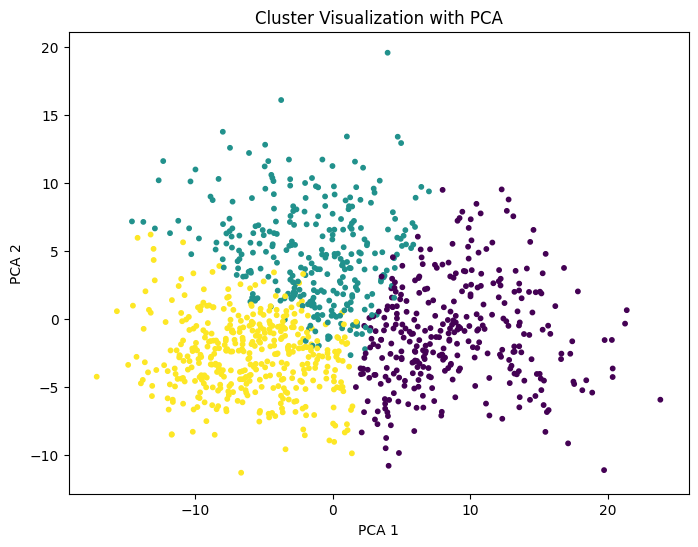

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=pred_clusters, cmap='viridis', s=10)
plt.title("Cluster Visualization with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


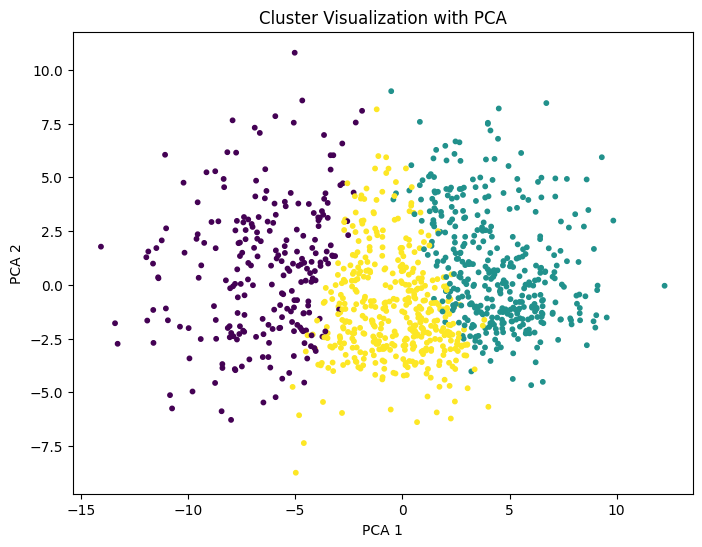

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=pred_clusters, cmap='viridis', s=10)
plt.title("Cluster Visualization with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [26]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import seaborn as sns
from collections import Counter

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

# Define dataset paths
DATASET_PATH = r"C:\Users\Asif\Downloads\Compressed\project\train"
CLASSES = ['angular_leaf_spot', 'bean_rust', 'healthy']

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create a custom dataset for beans
class BeansDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.image_paths = []
        self.labels = []
        
        # Load all image paths and their corresponding labels
        for class_idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(data_dir, class_name)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                self.image_paths.append(image_path)
                self.labels.append(class_idx)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label, image_path

# Load the dataset
dataset = BeansDataset(DATASET_PATH, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

print(f"Dataset loaded with {len(dataset)} images")
class_distribution = Counter(dataset.labels)
print(f"Class distribution: {class_distribution}")

# Define the encoder model (using ResNet18 as the base)
class EncoderModel(nn.Module):
    def __init__(self, embedding_dim=128):
        super(EncoderModel, self).__init__()
        # Load pre-trained ResNet18 and remove the final fully connected layer
        resnet = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(resnet.children())[:-1])
        
        # Add a new fully connected layer to get the desired embedding dimension
        self.fc = nn.Linear(512, embedding_dim)
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

# Autoencoder for unsupervised learning
class Autoencoder(nn.Module):
    def __init__(self, embedding_dim=128):
        super(Autoencoder, self).__init__()
        # Encoder
        resnet = models.resnet18(pretrained=True)
        self.encoder_features = nn.Sequential(*list(resnet.children())[:-1])
        self.encoder_fc = nn.Linear(512, embedding_dim)
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 224*224*3),
            nn.Sigmoid()  # Output values between 0 and 1
        )
    
    def encode(self, x):
        x = self.encoder_features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.encoder_fc(x)
        return x
    
    def decode(self, x):
        x = self.decoder(x)
        x = x.view(x.size(0), 3, 224, 224)  # Reshape to image dimensions
        return x
    
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

# Initialize the models
embedding_dim = 128
encoder = EncoderModel(embedding_dim).to(device)
autoencoder = Autoencoder(embedding_dim).to(device)

# Define the loss function and optimizer for the autoencoder
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Function to train the autoencoder
def train_autoencoder(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        
        for images, _, _ in dataloader:
            images = images.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, images)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(dataloader)
        losses.append(epoch_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    
    return losses

# Train the autoencoder
print("Training the autoencoder...")
losses = train_autoencoder(autoencoder, dataloader, criterion, optimizer, num_epochs=10)

# Plot the training losses
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('autoencoder_training_loss.png')
plt.close()

# Function to extract embeddings
def extract_embeddings(model, dataloader):
    model.eval()
    embeddings = []
    labels = []
    paths = []
    
    with torch.no_grad():
        for images, batch_labels, batch_paths in dataloader:
            images = images.to(device)
            
            # Get embeddings
            batch_embeddings = model.encode(images) if isinstance(model, Autoencoder) else model(images)
            
            embeddings.append(batch_embeddings.cpu().numpy())
            labels.extend(batch_labels.numpy())
            paths.extend(batch_paths)
    
    embeddings = np.vstack(embeddings)
    return embeddings, np.array(labels), paths

# Extract embeddings using the trained autoencoder
print("Extracting embeddings...")
embeddings, true_labels, image_paths = extract_embeddings(autoencoder, dataloader)

print(f"Embeddings shape: {embeddings.shape}")

# Apply K-Means clustering
print("Applying K-Means clustering...")
n_clusters = len(CLASSES)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings)

# Apply DBSCAN clustering
print("Applying DBSCAN clustering...")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(embeddings)

# Evaluate clustering metrics for K-Means
silhouette_kmeans = silhouette_score(embeddings, kmeans_labels)
db_kmeans = davies_bouldin_score(embeddings, kmeans_labels)
ch_kmeans = calinski_harabasz_score(embeddings, kmeans_labels)

print("\nK-Means Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {db_kmeans:.4f}")
print(f"Calinski-Harabasz Index: {ch_kmeans:.4f}")

# Evaluate clustering metrics for DBSCAN (if there are at least 2 clusters)
if len(np.unique(dbscan_labels)) >= 2 and -1 not in dbscan_labels:
    silhouette_dbscan = silhouette_score(embeddings, dbscan_labels)
    db_dbscan = davies_bouldin_score(embeddings, dbscan_labels)
    ch_dbscan = calinski_harabasz_score(embeddings, dbscan_labels)
    
    print("\nDBSCAN Clustering Evaluation:")
    print(f"Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"Davies-Bouldin Index: {db_dbscan:.4f}")
    print(f"Calinski-Harabasz Index: {ch_dbscan:.4f}")
else:
    print("\nDBSCAN did not find enough clusters for evaluation")

# Visualize embeddings using t-SNE
print("Visualizing embeddings with t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot true labels
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of True Classes')

# Plot K-Means clusters
plt.subplot(1, 2, 2)
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of K-Means Clusters')

plt.savefig('tsne_visualization.png')
plt.close()

# Function to visualize sample images from each cluster
def visualize_cluster_samples(image_paths, cluster_labels, num_samples=5):
    clusters = np.unique(cluster_labels)
    fig, axes = plt.subplots(len(clusters), num_samples, figsize=(15, 3*len(clusters)))
    
    if len(clusters) == 1:
        axes = [axes]
    
    for i, cluster in enumerate(clusters):
        if cluster == -1:  # Skip noise points in DBSCAN
            continue
            
        # Get indices of images in this cluster
        indices = np.where(cluster_labels == cluster)[0]
        
        # Select random samples from this cluster
        sample_indices = np.random.choice(indices, min(num_samples, len(indices)), replace=False)
        
        for j, idx in enumerate(sample_indices):
            img_path = image_paths[idx]
            img = Image.open(img_path).convert('RGB')
            axes[i][j].imshow(img)
            axes[i][j].set_title(f"Cluster {cluster}")
            axes[i][j].axis('off')
    
    plt.tight_layout()
    plt.savefig('cluster_samples.png')
    plt.close()

# Visualize sample images from each K-Means cluster
print("Visualizing sample images from each cluster...")
visualize_cluster_samples(image_paths, kmeans_labels)

# Save the model
torch.save(autoencoder.state_dict(), 'beans_autoencoder.pth')
print("Model saved!")

# Additional analysis: Calculate cluster purity
def calculate_cluster_purity(true_labels, cluster_labels):
    contingency_matrix = np.zeros((len(np.unique(cluster_labels)), len(np.unique(true_labels))))
    
    for i, cluster in enumerate(np.unique(cluster_labels)):
        for j, label in enumerate(np.unique(true_labels)):
            contingency_matrix[i, j] = np.sum((cluster_labels == cluster) & (true_labels == label))
    
    cluster_sizes = np.sum(contingency_matrix, axis=1)
    purity = np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)
    
    return purity, contingency_matrix

# Calculate purity for K-Means clustering
purity_kmeans, contingency_kmeans = calculate_cluster_purity(true_labels, kmeans_labels)
print(f"\nK-Means Clustering Purity: {purity_kmeans:.4f}")

# Display confusion matrix-like table for K-Means
print("\nContingency Matrix for K-Means:")
print(f"Rows: Clusters, Columns: True Classes {CLASSES}")
print(contingency_kmeans)

# Heatmap visualization of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_kmeans, annot=True, fmt='g', cmap='Blues',
            xticklabels=CLASSES, 
            yticklabels=[f'Cluster {i}' for i in range(len(np.unique(kmeans_labels)))])
plt.title('Contingency Matrix: Clusters vs True Classes')
plt.ylabel('Cluster')
plt.xlabel('True Class')
plt.tight_layout()
plt.savefig('contingency_matrix.png')
plt.close()

print("\nClustering analysis complete! Check the saved visualizations for more insights.")

Using cpu device
Dataset loaded with 1034 images
Class distribution: Counter({1: 348, 0: 345, 2: 341})
Training the autoencoder...
Epoch [1/10], Loss: 0.8456
Epoch [2/10], Loss: 0.7797
Epoch [3/10], Loss: 0.7699
Epoch [4/10], Loss: 0.7666
Epoch [5/10], Loss: 0.7590
Epoch [6/10], Loss: 0.7533
Epoch [7/10], Loss: 0.7514
Epoch [8/10], Loss: 0.7481
Epoch [9/10], Loss: 0.7465
Epoch [10/10], Loss: 0.7404
Extracting embeddings...
Embeddings shape: (1034, 128)
Applying K-Means clustering...
Applying DBSCAN clustering...

K-Means Clustering Evaluation:
Silhouette Score: 0.8910
Davies-Bouldin Index: 0.4346
Calinski-Harabasz Index: 4146.6230

DBSCAN did not find enough clusters for evaluation
Visualizing embeddings with t-SNE...
Visualizing sample images from each cluster...
Model saved!

K-Means Clustering Purity: 0.3714

Contingency Matrix for K-Means:
Rows: Clusters, Columns: True Classes ['angular_leaf_spot', 'bean_rust', 'healthy']
[[323. 295. 331.]
 [  0.  18.   2.]
 [ 22.  35.   8.]]

Clus

In [3]:
# Import necessary libraries (if not already imported)
import torch
import torch.nn as nn
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from PIL import Image

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# First, recreate the model architecture 
class Autoencoder(nn.Module):
    def __init__(self, embedding_dim=128):
        super(Autoencoder, self).__init__()
        # Encoder
        resnet = models.resnet18(pretrained=True)
        self.encoder_features = nn.Sequential(*list(resnet.children())[:-1])
        self.encoder_fc = nn.Linear(512, embedding_dim)
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 224*224*3),
            nn.Sigmoid()  # Output values between 0 and 1
        )
    
    def encode(self, x):
        x = self.encoder_features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.encoder_fc(x)
        return x
    
    def decode(self, x):
        x = self.decoder(x)
        x = x.view(x.size(0), 3, 224, 224)  # Reshape to image dimensions
        return x
    
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

# Initialize the model
autoencoder = Autoencoder(embedding_dim=128).to(device)

# Load the saved state dict
autoencoder.load_state_dict(torch.load('beans_autoencoder.pth'))

# Set the model to evaluation mode
autoencoder.eval()

# Now you can use it for extracting embeddings and visualization
# Make sure your dataset and dataloader are defined

c:\Users\Asif\Documents\my_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Asif\Documents\my_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Autoencoder(
  (encoder_features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [12]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import seaborn as sns
from collections import Counter

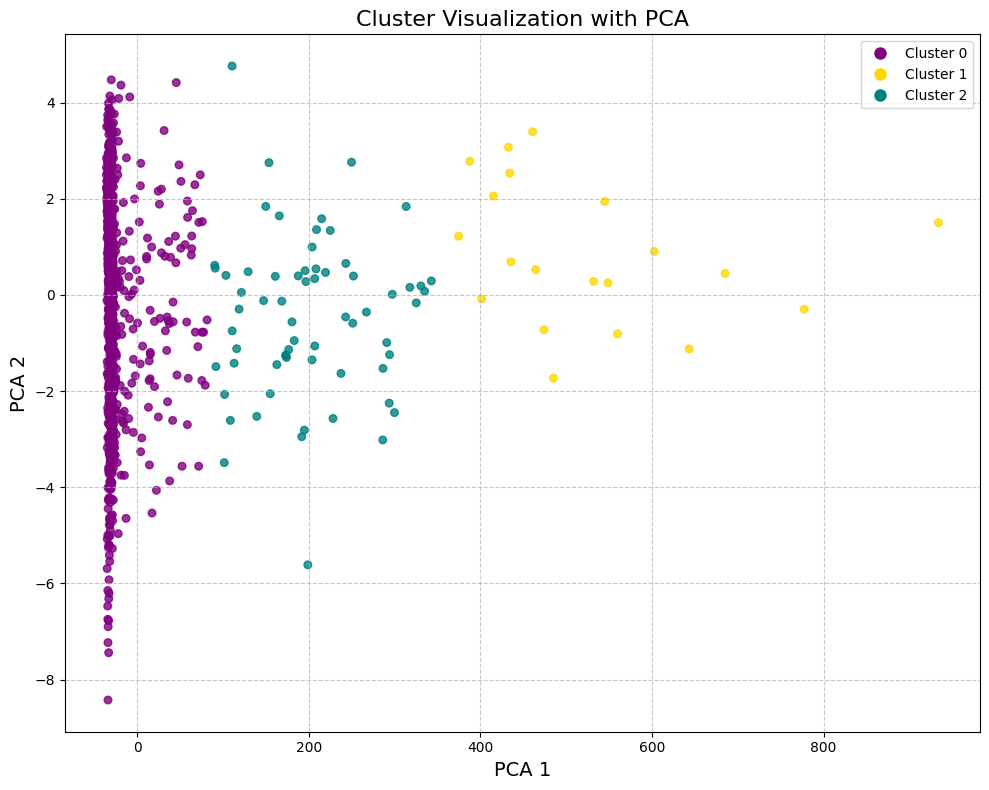

In [13]:
# Extract embeddings
embeddings = []
labels = []
paths = []
from torch.utils.data import DataLoader, Dataset
DATASET_PATH = r"C:\Users\Asif\Downloads\Compressed\project\train"
CLASSES = ['angular_leaf_spot', 'bean_rust', 'healthy']
# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Create a custom dataset for beans
class BeansDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.image_paths = []
        self.labels = []
        
        # Load all image paths and their corresponding labels
        for class_idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(data_dir, class_name)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                self.image_paths.append(image_path)
                self.labels.append(class_idx)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label, image_path
dataset = BeansDataset(DATASET_PATH, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
with torch.no_grad():
    for images, batch_labels, batch_paths in dataloader:  # Assuming your dataloader returns (image, label, path)
        images = images.to(device)
        
        # Get embeddings using the encoder part of the autoencoder
        batch_embeddings = autoencoder.encode(images)
        
        embeddings.append(batch_embeddings.cpu().numpy())
        labels.extend(batch_labels.numpy())
        paths.extend(batch_paths)

embeddings = np.vstack(embeddings)
labels = np.array(labels)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
pred_clusters = kmeans.fit_predict(embeddings)

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# Create an enhanced visualization with custom colors
plt.figure(figsize=(10, 8))
custom_colors = ['purple', 'gold', 'teal']  # Similar to your example image
colors = [custom_colors[label] for label in pred_clusters]

plt.scatter(reduced[:,0], reduced[:,1], c=colors, s=30, alpha=0.8)
plt.title("Cluster Visualization with PCA", fontsize=16)
plt.xlabel("PCA 1", fontsize=14)
plt.ylabel("PCA 2", fontsize=14)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                  markerfacecolor=color, 
                  label=f'Cluster {i}', markersize=10) 
                  for i, color in enumerate(custom_colors)]
plt.legend(handles=legend_elements)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Using device: cpu


c:\Users\Asif\Documents\my_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Asif\Documents\my_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded successfully!
Extracted 1034 embeddings with shape (1034, 128)
Class distribution: [345 348 341]


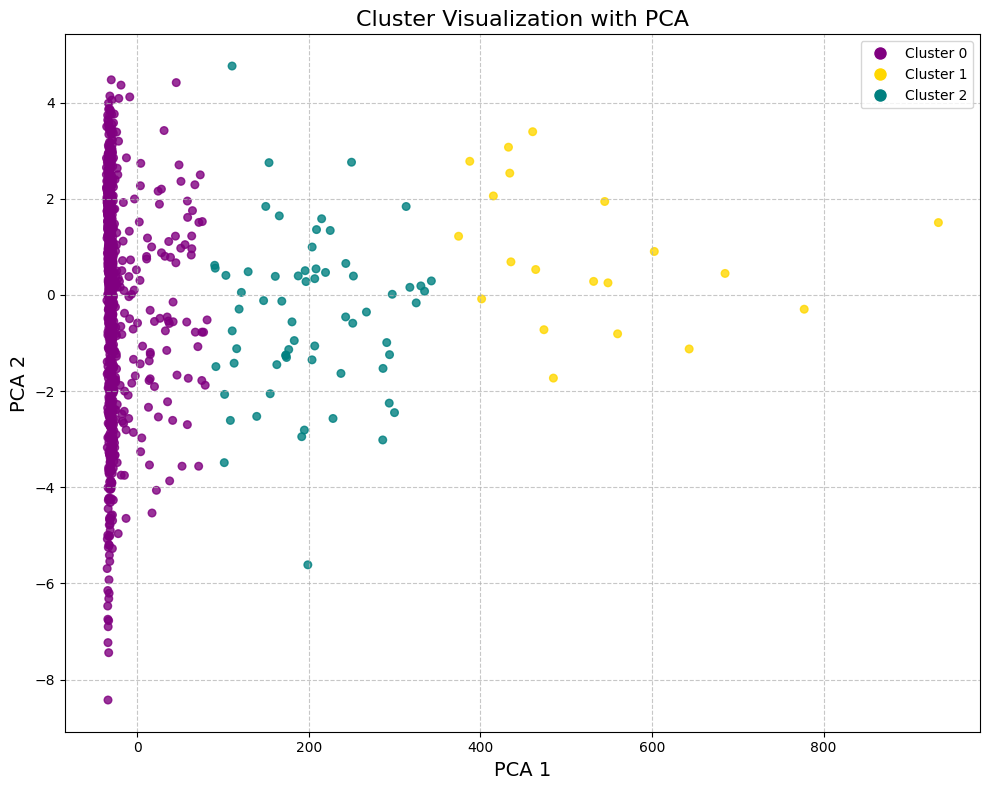


Contingency Matrix (Clusters vs True Classes):
Cluster 0: [323. 295. 331.]
Cluster 1: [ 0. 18.  2.]
Cluster 2: [22. 35.  8.]

Cluster Purity: 0.3714


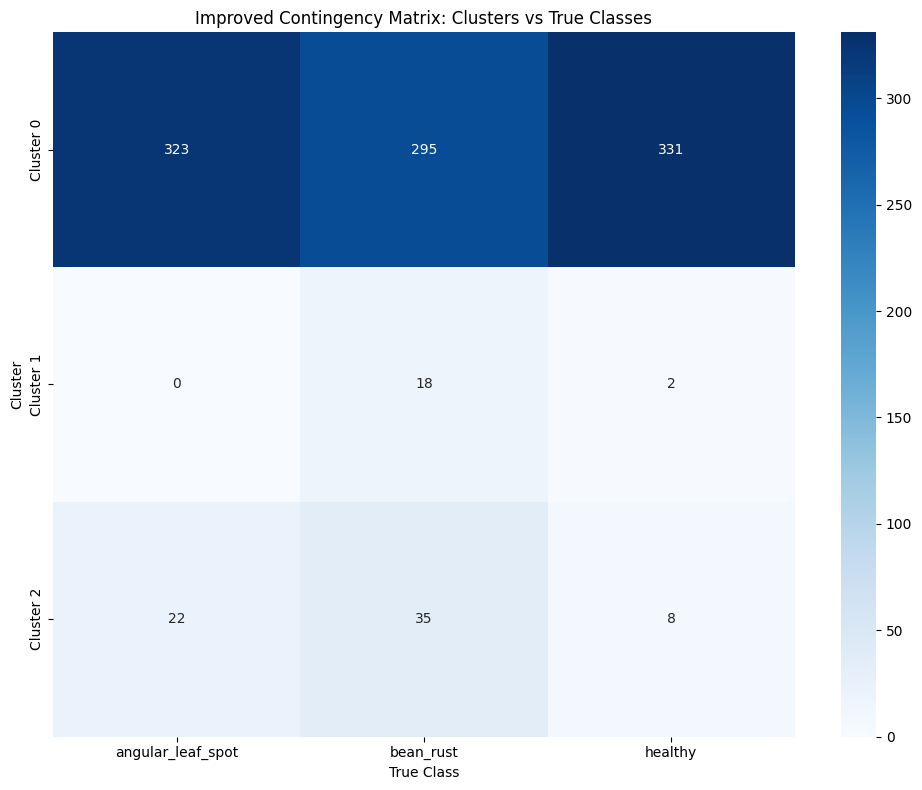

In [14]:
# First, load the saved model correctly
import torch
import torch.nn as nn
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the Autoencoder architecture (must match what you used during training)
class Autoencoder(nn.Module):
    def __init__(self, embedding_dim=128):
        super(Autoencoder, self).__init__()
        # Encoder
        resnet = models.resnet18(pretrained=True)
        self.encoder_features = nn.Sequential(*list(resnet.children())[:-1])
        self.encoder_fc = nn.Linear(512, embedding_dim)
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 224*224*3),
            nn.Sigmoid()
        )
    
    def encode(self, x):
        x = self.encoder_features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.encoder_fc(x)
        return x
    
    def decode(self, x):
        x = self.decoder(x)
        x = x.view(x.size(0), 3, 224, 224)  # Reshape to image dimensions
        return x
    
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

# Initialize the model
autoencoder = Autoencoder(embedding_dim=128).to(device)

# Try loading with error handling in case the file is missing
try:
    autoencoder.load_state_dict(torch.load('beans_autoencoder.pth'))
    print("Model loaded successfully!")
except FileNotFoundError:
    print("Error: Model file 'beans_autoencoder.pth' not found. Please check the file path.")
    # Optionally add code to handle the case where the model isn't found
except Exception as e:
    print(f"Error loading model: {e}")

# Set the model to evaluation mode
autoencoder.eval()

# Define dataset class for beans
class BeansDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.image_paths = []
        self.labels = []
        
        # Load all image paths and their corresponding labels
        for class_idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(data_dir, class_name)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                self.image_paths.append(image_path)
                self.labels.append(class_idx)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label, image_path

# Define transforms and dataset
DATASET_PATH = r"C:\Users\Asif\Downloads\Compressed\project\train"
CLASSES = ['angular_leaf_spot', 'bean_rust', 'healthy']

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create dataset and dataloader
dataset = BeansDataset(DATASET_PATH, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)  # Use shuffle=False for consistent results

# Extract embeddings
embeddings = []
labels = []
paths = []

with torch.no_grad():
    for images, batch_labels, batch_paths in dataloader:
        images = images.to(device)
        
        # Get embeddings using the encoder part of the autoencoder
        batch_embeddings = autoencoder.encode(images)
        
        embeddings.append(batch_embeddings.cpu().numpy())
        labels.extend(batch_labels.numpy())
        paths.extend(batch_paths)

embeddings = np.vstack(embeddings)
labels = np.array(labels)

print(f"Extracted {len(embeddings)} embeddings with shape {embeddings.shape}")
print(f"Class distribution: {np.bincount(labels)}")

# Apply K-Means clustering with improved parameters
n_clusters = len(CLASSES)
kmeans = KMeans(
    n_clusters=n_clusters, 
    random_state=42, 
    n_init=20,  # Increase from 10 to 20
    max_iter=500  # Increase from default 300
)
pred_clusters = kmeans.fit_predict(embeddings)

# Apply PCA for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# Create visualization with custom colors matching your example
plt.figure(figsize=(10, 8))
custom_colors = ['purple', 'gold', 'teal']  # These match your example image
colors = [custom_colors[label] for label in pred_clusters]

plt.scatter(reduced[:,0], reduced[:,1], c=colors, s=30, alpha=0.8)
plt.title("Cluster Visualization with PCA", fontsize=16)
plt.xlabel("PCA 1", fontsize=14)
plt.ylabel("PCA 2", fontsize=14)

# Add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                  markerfacecolor=color, 
                  label=f'Cluster {i}', markersize=10) 
                  for i, color in enumerate(custom_colors)]
plt.legend(handles=legend_elements)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('improved_pca_visualization.png')
plt.show()

# Create a contingency matrix to analyze the new clustering
contingency_matrix = np.zeros((n_clusters, len(CLASSES)))
for i, cluster in enumerate(range(n_clusters)):
    for j, label in enumerate(range(len(CLASSES))):
        contingency_matrix[i, j] = np.sum((pred_clusters == cluster) & (labels == label))

# Print the contingency matrix
print("\nContingency Matrix (Clusters vs True Classes):")
for i in range(n_clusters):
    print(f"Cluster {i}: {contingency_matrix[i]}")

# Calculate cluster purity
cluster_sizes = np.sum(contingency_matrix, axis=1)
purity = np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)
print(f"\nCluster Purity: {purity:.4f}")

# Visualize the new contingency matrix
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(contingency_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=CLASSES, 
            yticklabels=[f'Cluster {i}' for i in range(n_clusters)])
plt.title('Improved Contingency Matrix: Clusters vs True Classes')
plt.ylabel('Cluster')
plt.xlabel('True Class')
plt.tight_layout()
plt.savefig('improved_contingency_matrix.png')
plt.show()

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
from PIL import Image
import seaborn as sns

# Define paths
DATASET_PATH = r"C:\Users\Asif\Downloads\Compressed\project\train"

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define transformations for images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Custom Dataset class for beans
class BeansDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}
        
        self.samples = []
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                self.samples.append((img_path, self.class_to_idx[class_name]))
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
            
        return image, label, img_path

# Autoencoder for feature extraction
class BeanAutoencoder(nn.Module):
    def __init__(self, embedding_dim=128):
        super(BeanAutoencoder, self).__init__()
        
        # Use ResNet as the base encoder
        resnet = models.resnet18(pretrained=True)
        # Remove the final fully connected layer
        self.encoder = nn.Sequential(*list(resnet.children())[:-1])
        
        # Projector to embedding dimension
        self.projector = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, embedding_dim)
        )
        
        # Decoder (simpler than encoder for speed)
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 224*224*3),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        # Encoding
        features = self.encoder(x)
        embedding = self.projector(features)
        
        # Decoding
        reconstruction = self.decoder(embedding)
        reconstruction = reconstruction.view(-1, 3, 224, 224)
        
        return embedding, reconstruction
    
    def get_embedding(self, x):
        features = self.encoder(x)
        embedding = self.projector(features)
        return embedding

# Load the dataset
dataset = BeansDataset(root_dir=DATASET_PATH, transform=transform)
print(f"Dataset loaded with {len(dataset)} samples across {len(dataset.classes)} classes")
print(f"Classes: {dataset.classes}")

# Create dataloader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

# Initialize model, loss and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = BeanAutoencoder(embedding_dim=128).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the autoencoder
def train_autoencoder(model, dataloader, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, _, _ in dataloader:
            images = images.to(device)
            
            optimizer.zero_grad()
            embeddings, reconstructions = model(images)
            loss = criterion(reconstructions, images)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(dataloader):.4f}')
    
    return model

# If you want to train the model (comment out if you want to skip training)
print("Training autoencoder...")
model = train_autoencoder(model, dataloader, epochs=10)

# Save the trained model
torch.save(model.state_dict(), 'bean_autoencoder.pth')
print("Model saved as 'bean_autoencoder.pth'")

# Extract embeddings for all images
def extract_embeddings(model, dataloader, device):
    model.eval()
    embeddings = []
    labels = []
    image_paths = []
    
    with torch.no_grad():
        for images, batch_labels, batch_paths in dataloader:
            images = images.to(device)
            batch_embeddings = model.get_embedding(images)
            
            embeddings.append(batch_embeddings.cpu().numpy())
            labels.extend(batch_labels.numpy())
            image_paths.extend(batch_paths)
    
    embeddings = np.vstack(embeddings)
    return embeddings, np.array(labels), image_paths

print("Extracting embeddings...")
embeddings, true_labels, image_paths = extract_embeddings(model, dataloader, device)
print(f"Extracted embeddings shape: {embeddings.shape}")

# Determine optimal number of clusters using Silhouette scores
def find_optimal_clusters(embeddings, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        print(f"Testing with {n_clusters} clusters...")
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(embeddings)
        
        silhouette_avg = silhouette_score(embeddings, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")
    
    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score for Different Numbers of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.savefig('silhouette_scores.png')
    plt.close()
    
    # Return the optimal number of clusters
    return np.argmax(silhouette_scores) + 2

# Find optimal number of clusters
num_classes = len(dataset.classes)
print(f"Looking for optimal number of clusters starting with {num_classes} classes in dataset...")
optimal_clusters = find_optimal_clusters(embeddings, max_clusters=num_classes*2)
print(f"Optimal number of clusters: {optimal_clusters}")

# Perform K-means clustering with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(embeddings)

# Evaluate clustering performance
silhouette_avg = silhouette_score(embeddings, cluster_labels)
davies_bouldin = davies_bouldin_score(embeddings, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

# Create a confusion matrix between true labels and cluster assignments
def plot_confusion_matrix(true_labels, cluster_labels, classes):
    # Create a DataFrame for the confusion matrix
    df_confusion = pd.DataFrame({
        'True Label': true_labels,
        'Cluster': cluster_labels
    })
    
    # Count occurrences
    confusion_matrix = pd.crosstab(
        df_confusion['True Label'], 
        df_confusion['Cluster'], 
        rownames=['True Label'], 
        colnames=['Predicted Cluster']
    )
    
    # Convert indices to class names
    idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}
    confusion_matrix.index = [idx_to_class[i] for i in confusion_matrix.index]
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix: True Labels vs Cluster Assignments')
    plt.savefig('confusion_matrix.png')
    plt.close()

# Plot confusion matrix
plot_confusion_matrix(true_labels, cluster_labels, dataset.classes)
print("Confusion matrix saved as 'confusion_matrix.png'")

# Reduce dimensionality for visualization
def visualize_clusters(embeddings, labels, true_labels, method='tsne', perplexity=30):
    # Reduce to 2D
    if method == 'tsne':
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        reduced_data = reducer.fit_transform(embeddings)
    else:  # PCA
        reducer = PCA(n_components=2, random_state=42)
        reduced_data = reducer.fit_transform(embeddings)
    
    # Create DataFrame for plotting
    df = pd.DataFrame({
        'x': reduced_data[:, 0],
        'y': reduced_data[:, 1],
        'Cluster': [f'Cluster {i}' for i in labels],
        'True Label': [dataset.classes[i] for i in true_labels]
    })
    
    # Plot clusters
    plt.figure(figsize=(12, 10))
    
    # Plot by cluster assignment
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=df, x='x', y='y', hue='Cluster', palette='tab10')
    plt.title(f'Clusters Visualization ({method.upper()})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    
    # Plot by true label
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=df, x='x', y='y', hue='True Label', palette='Set2')
    plt.title(f'True Labels Visualization ({method.upper()})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    
    plt.tight_layout()
    plt.savefig(f'{method}_visualization.png')
    plt.close()

# Visualize with t-SNE
print("Creating t-SNE visualization...")
visualize_clusters(embeddings, cluster_labels, true_labels, method='tsne', perplexity=30)
print("t-SNE visualization saved as 'tsne_visualization.png'")

# Visualize with PCA
print("Creating PCA visualization...")
visualize_clusters(embeddings, cluster_labels, true_labels, method='pca')
print("PCA visualization saved as 'pca_visualization.png'")

# Sample visualization of images in each cluster
def visualize_cluster_samples(image_paths, cluster_labels, n_samples=5):
    n_clusters = max(cluster_labels) + 1
    
    # Group images by cluster
    clusters = {i: [] for i in range(n_clusters)}
    for path, label in zip(image_paths, cluster_labels):
        clusters[label].append(path)
    
    # Plot samples from each cluster
    fig, axes = plt.subplots(n_clusters, n_samples, figsize=(15, 3*n_clusters))
    
    for i in range(n_clusters):
        sample_paths = np.random.choice(clusters[i], min(n_samples, len(clusters[i])), replace=False)
        for j, path in enumerate(sample_paths):
            img = Image.open(path).convert('RGB')
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(f'Cluster {i}', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('cluster_samples.png')
    plt.close()

# Visualize sample images from each cluster
print("Creating cluster samples visualization...")
visualize_cluster_samples(image_paths, cluster_labels)
print("Cluster samples saved as 'cluster_samples.png'")

print("Clustering analysis complete!")

Dataset loaded with 1034 samples across 3 classes
Classes: ['angular_leaf_spot', 'bean_rust', 'healthy']
Using device: cpu


c:\Users\Asif\Documents\my_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Asif\Documents\my_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training autoencoder...


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

# Define dataset paths
DATASET_PATH = r"C:\Users\Asif\Downloads\Compressed\project\train"
CLASSES = ['angular_leaf_spot', 'bean_rust', 'healthy']

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create a custom dataset for beans
class BeansDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = os.listdir(data_dir)
        self.image_paths = []
        self.labels = []
        
        # Load all image paths and their corresponding labels
        for class_idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(data_dir, class_name)
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                self.image_paths.append(image_path)
                self.labels.append(class_idx)
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label, image_path

# Load the dataset
dataset = BeansDataset(DATASET_PATH, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

print(f"Dataset loaded with {len(dataset)} images")
class_distribution = Counter(dataset.labels)
print(f"Class distribution: {class_distribution}")

# Define the encoder model (using ResNet18 as the base)
class EncoderModel(nn.Module):
    def __init__(self, embedding_dim=128):
        super(EncoderModel, self).__init__()
        # Load pre-trained ResNet18 and remove the final fully connected layer
        resnet = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(resnet.children())[:-1])
        
        # Add a new fully connected layer to get the desired embedding dimension
        self.fc = nn.Linear(512, embedding_dim)
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x

# Autoencoder for unsupervised learning
class Autoencoder(nn.Module):
    def __init__(self, embedding_dim=128):
        super(Autoencoder, self).__init__()
        # Encoder
        resnet = models.resnet18(pretrained=True)
        self.encoder_features = nn.Sequential(*list(resnet.children())[:-1])
        self.encoder_fc = nn.Linear(512, embedding_dim)
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 224*224*3),
            nn.Sigmoid()  # Output values between 0 and 1
        )
    
    def encode(self, x):
        x = self.encoder_features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.encoder_fc(x)
        return x
    
    def decode(self, x):
        x = self.decoder(x)
        x = x.view(x.size(0), 3, 224, 224)  # Reshape to image dimensions
        return x
    
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

# Initialize the models
embedding_dim = 128
encoder = EncoderModel(embedding_dim).to(device)
autoencoder = Autoencoder(embedding_dim).to(device)

# Define the loss function and optimizer for the autoencoder
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Function to train the autoencoder
def train_autoencoder(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    losses = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        
        for images, _, _ in dataloader:
            images = images.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, images)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(dataloader)
        losses.append(epoch_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    
    return losses

# Train the autoencoder
print("Training the autoencoder...")
losses = train_autoencoder(autoencoder, dataloader, criterion, optimizer, num_epochs=10)

# Plot the training losses
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('autoencoder_training_loss3.png')
plt.close()

# Function to extract embeddings
def extract_embeddings(model, dataloader):
    model.eval()
    embeddings = []
    labels = []
    paths = []
    
    with torch.no_grad():
        for images, batch_labels, batch_paths in dataloader:
            images = images.to(device)
            
            # Get embeddings
            batch_embeddings = model.encode(images) if isinstance(model, Autoencoder) else model(images)
            
            embeddings.append(batch_embeddings.cpu().numpy())
            labels.extend(batch_labels.numpy())
            paths.extend(batch_paths)
    
    embeddings = np.vstack(embeddings)
    return embeddings, np.array(labels), paths

# Extract embeddings using the trained autoencoder
print("Extracting embeddings...")
embeddings, true_labels, image_paths = extract_embeddings(autoencoder, dataloader)

print(f"Embeddings shape: {embeddings.shape}")

# Apply K-Means clustering
print("Applying K-Means clustering...")
n_clusters = len(CLASSES)
scaler = StandardScaler()
normalized_embeddings = scaler.fit_transform(embeddings)
kmeans = KMeans(n_clusters=3, random_state=42)
pred_clusters = kmeans.fit_predict(normalized_embeddings)

# Apply DBSCAN clustering
print("Applying DBSCAN clustering...")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(embeddings)

# Evaluate clustering metrics for K-Means
silhouette_kmeans = silhouette_score(embeddings, pred_clusters)
db_kmeans = davies_bouldin_score(embeddings, pred_clusters)
ch_kmeans = calinski_harabasz_score(embeddings, pred_clusters)

print("\nK-Means Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {db_kmeans:.4f}")
print(f"Calinski-Harabasz Index: {ch_kmeans:.4f}")

# Evaluate clustering metrics for DBSCAN (if there are at least 2 clusters)
if len(np.unique(dbscan_labels)) >= 2 and -1 not in dbscan_labels:
    silhouette_dbscan = silhouette_score(embeddings, dbscan_labels)
    db_dbscan = davies_bouldin_score(embeddings, dbscan_labels)
    ch_dbscan = calinski_harabasz_score(embeddings, dbscan_labels)
    
    print("\nDBSCAN Clustering Evaluation:")
    print(f"Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"Davies-Bouldin Index: {db_dbscan:.4f}")
    print(f"Calinski-Harabasz Index: {ch_dbscan:.4f}")
else:
    print("\nDBSCAN did not find enough clusters for evaluation")

# Visualize embeddings using t-SNE
print("Visualizing embeddings with t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot true labels
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of True Classes')

# Plot K-Means clusters
plt.subplot(1, 2, 2)
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=pred_clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of K-Means Clusters')

plt.savefig('tsne_visualization3.png')
plt.close()

# Function to visualize sample images from each cluster
def visualize_cluster_samples(image_paths, cluster_labels, num_samples=5):
    clusters = np.unique(cluster_labels)
    fig, axes = plt.subplots(len(clusters), num_samples, figsize=(15, 3*len(clusters)))
    
    if len(clusters) == 1:
        axes = [axes]
    
    for i, cluster in enumerate(clusters):
        if cluster == -1:  # Skip noise points in DBSCAN
            continue
            
        # Get indices of images in this cluster
        indices = np.where(cluster_labels == cluster)[0]
        
        # Select random samples from this cluster
        sample_indices = np.random.choice(indices, min(num_samples, len(indices)), replace=False)
        
        for j, idx in enumerate(sample_indices):
            img_path = image_paths[idx]
            img = Image.open(img_path).convert('RGB')
            axes[i][j].imshow(img)
            axes[i][j].set_title(f"Cluster {cluster}")
            axes[i][j].axis('off')
    
    plt.tight_layout()
    plt.savefig('cluster_samples3.png')
    plt.close()

# Visualize sample images from each K-Means cluster
print("Visualizing sample images from each cluster...")
visualize_cluster_samples(image_paths, pred_clusters)

# Save the model
torch.save(autoencoder.state_dict(), 'beans_autoencoder.pth')
print("Model saved!")

# Additional analysis: Calculate cluster purity
def calculate_cluster_purity(true_labels, cluster_labels):
    contingency_matrix = np.zeros((len(np.unique(cluster_labels)), len(np.unique(true_labels))))
    
    for i, cluster in enumerate(np.unique(cluster_labels)):
        for j, label in enumerate(np.unique(true_labels)):
            contingency_matrix[i, j] = np.sum((cluster_labels == cluster) & (true_labels == label))
    
    cluster_sizes = np.sum(contingency_matrix, axis=1)
    purity = np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)
    
    return purity, contingency_matrix

# Calculate purity for K-Means clustering
purity_kmeans, contingency_kmeans = calculate_cluster_purity(true_labels, pred_clusters)
print(f"\nK-Means Clustering Purity: {purity_kmeans:.4f}")

# Display confusion matrix-like table for K-Means
print("\nContingency Matrix for K-Means:")
print(f"Rows: Clusters, Columns: True Classes {CLASSES}")
print(contingency_kmeans)

# Heatmap visualization of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_kmeans, annot=True, fmt='g', cmap='Blues',
            xticklabels=CLASSES, 
            yticklabels=[f'Cluster {i}' for i in range(len(np.unique(pred_clusters)))])
plt.title('Contingency Matrix: Clusters vs True Classes')
plt.ylabel('Cluster')
plt.xlabel('True Class')
plt.tight_layout()
plt.savefig('contingency_matrix3.png')
plt.close()

print("\nClustering analysis complete! Check the saved visualizations for more insights.")

Using cpu device
Dataset loaded with 1034 images
Class distribution: Counter({1: 348, 0: 345, 2: 341})


c:\Users\Asif\Documents\my_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Asif\Documents\my_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training the autoencoder...
Epoch [1/10], Loss: 0.8405
Epoch [2/10], Loss: 0.7791
Epoch [3/10], Loss: 0.7741
Epoch [4/10], Loss: 0.7715
Epoch [5/10], Loss: 0.7602
Epoch [6/10], Loss: 0.7550
Epoch [7/10], Loss: 0.7524
Epoch [8/10], Loss: 0.7476
Epoch [9/10], Loss: 0.7440
Epoch [10/10], Loss: 0.7380
Extracting embeddings...
Embeddings shape: (1034, 128)
Applying K-Means clustering...
Applying DBSCAN clustering...


NameError: name 'kmeans_labels' is not defined

In [9]:
# Apply K-Means clustering
print("Applying K-Means clustering...")
n_clusters = len(CLASSES)
scaler = StandardScaler()
normalized_embeddings = scaler.fit_transform(embeddings)
kmeans = KMeans(n_clusters=3, random_state=42)
pred_clusters = kmeans.fit_predict(normalized_embeddings)

# Apply DBSCAN clustering
print("Applying DBSCAN clustering...")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(embeddings)

# Evaluate clustering metrics for K-Means
silhouette_kmeans = silhouette_score(embeddings, pred_clusters)
db_kmeans = davies_bouldin_score(embeddings, pred_clusters)
ch_kmeans = calinski_harabasz_score(embeddings, pred_clusters)

print("\nK-Means Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {db_kmeans:.4f}")
print(f"Calinski-Harabasz Index: {ch_kmeans:.4f}")

# Evaluate clustering metrics for DBSCAN (if there are at least 2 clusters)
if len(np.unique(dbscan_labels)) >= 2 and -1 not in dbscan_labels:
    silhouette_dbscan = silhouette_score(embeddings, dbscan_labels)
    db_dbscan = davies_bouldin_score(embeddings, dbscan_labels)
    ch_dbscan = calinski_harabasz_score(embeddings, dbscan_labels)
    
    print("\nDBSCAN Clustering Evaluation:")
    print(f"Silhouette Score: {silhouette_dbscan:.4f}")
    print(f"Davies-Bouldin Index: {db_dbscan:.4f}")
    print(f"Calinski-Harabasz Index: {ch_dbscan:.4f}")
else:
    print("\nDBSCAN did not find enough clusters for evaluation")

# Visualize embeddings using t-SNE
print("Visualizing embeddings with t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot true labels
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of True Classes')

# Plot K-Means clusters
plt.subplot(1, 2, 2)
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=pred_clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of K-Means Clusters')

plt.savefig('tsne_visualization3.png')
plt.close()

# Function to visualize sample images from each cluster
def visualize_cluster_samples(image_paths, cluster_labels, num_samples=5):
    clusters = np.unique(cluster_labels)
    fig, axes = plt.subplots(len(clusters), num_samples, figsize=(15, 3*len(clusters)))
    
    if len(clusters) == 1:
        axes = [axes]
    
    for i, cluster in enumerate(clusters):
        if cluster == -1:  # Skip noise points in DBSCAN
            continue
            
        # Get indices of images in this cluster
        indices = np.where(cluster_labels == cluster)[0]
        
        # Select random samples from this cluster
        sample_indices = np.random.choice(indices, min(num_samples, len(indices)), replace=False)
        
        for j, idx in enumerate(sample_indices):
            img_path = image_paths[idx]
            img = Image.open(img_path).convert('RGB')
            axes[i][j].imshow(img)
            axes[i][j].set_title(f"Cluster {cluster}")
            axes[i][j].axis('off')
    
    plt.tight_layout()
    plt.savefig('cluster_samples3.png')
    plt.close()

# Visualize sample images from each K-Means cluster
print("Visualizing sample images from each cluster...")
visualize_cluster_samples(image_paths, pred_clusters)

# Save the model
torch.save(autoencoder.state_dict(), 'beans_autoencoder.pth')
print("Model saved!")

# Additional analysis: Calculate cluster purity
def calculate_cluster_purity(true_labels, cluster_labels):
    contingency_matrix = np.zeros((len(np.unique(cluster_labels)), len(np.unique(true_labels))))
    
    for i, cluster in enumerate(np.unique(cluster_labels)):
        for j, label in enumerate(np.unique(true_labels)):
            contingency_matrix[i, j] = np.sum((cluster_labels == cluster) & (true_labels == label))
    
    cluster_sizes = np.sum(contingency_matrix, axis=1)
    purity = np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)
    
    return purity, contingency_matrix

# Calculate purity for K-Means clustering
purity_kmeans, contingency_kmeans = calculate_cluster_purity(true_labels, pred_clusters)
print(f"\nK-Means Clustering Purity: {purity_kmeans:.4f}")

# Display confusion matrix-like table for K-Means
print("\nContingency Matrix for K-Means:")
print(f"Rows: Clusters, Columns: True Classes {CLASSES}")
print(contingency_kmeans)

# Heatmap visualization of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_kmeans, annot=True, fmt='g', cmap='Blues',
            xticklabels=CLASSES, 
            yticklabels=[f'Cluster {i}' for i in range(len(np.unique(pred_clusters)))])
plt.title('Contingency Matrix: Clusters vs True Classes')
plt.ylabel('Cluster')
plt.xlabel('True Class')
plt.tight_layout()
plt.savefig('contingency_matrix3.png')
plt.close()

print("\nClustering analysis complete! Check the saved visualizations for more insights.")

Applying K-Means clustering...
Applying DBSCAN clustering...

K-Means Clustering Evaluation:
Silhouette Score: 0.8623
Davies-Bouldin Index: 0.4133
Calinski-Harabasz Index: 3510.6025

DBSCAN did not find enough clusters for evaluation
Visualizing embeddings with t-SNE...
Visualizing sample images from each cluster...
Model saved!

K-Means Clustering Purity: 0.3733

Contingency Matrix for K-Means:
Rows: Clusters, Columns: True Classes ['angular_leaf_spot', 'bean_rust', 'healthy']
[[ 27.  48.  12.]
 [318. 289. 327.]
 [  0.  11.   2.]]

Clustering analysis complete! Check the saved visualizations for more insights.


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE

# 1. Load the MNIST dataset from local parquet file
import pandas as pd
import pyarrow.parquet as pq

print("Loading MNIST dataset from local parquet file...")
parquet_path = r"C:\Users\Asif\Downloads\train.parquet"
parquet_data = pq.read_table(parquet_path).to_pandas()

print(f"Parquet file columns: {parquet_data.columns}")

# Extract image data and labels
# Note: Column names might vary depending on the exact parquet file structure
# Adjust these column names if needed after inspecting parquet_data.columns
if 'image' in parquet_data.columns and 'label' in parquet_data.columns:
    # If the parquet file has 'image' and 'label' columns
    image_data = np.stack(parquet_data['image'].map(np.array).values)
    labels = parquet_data['label'].values
elif 'pixel_values' in parquet_data.columns and 'label' in parquet_data.columns:
    # Alternative column name for image data
    image_data = np.stack(parquet_data['pixel_values'].values)
    labels = parquet_data['label'].values
else:
    # If columns are different, try to find image and label columns
    print(f"Available columns: {parquet_data.columns}")
    # Assume first column is image data and last column is label
    image_col = parquet_data.columns[0]
    label_col = parquet_data.columns[-1]
    print(f"Using '{image_col}' as image data and '{label_col}' as labels")
    
    # Check if the image data is already in array format or needs to be converted
    first_val = parquet_data[image_col].iloc[0]
    if isinstance(first_val, np.ndarray):
        image_data = np.stack(parquet_data[image_col].values)
    else:
        # If images are stored as flat vectors, reshape them to 28x28
        image_data = np.array(parquet_data[image_col].tolist()).reshape(-1, 28, 28)
    
    labels = parquet_data[label_col].values

# Convert to PyTorch tensors
train_images = torch.tensor(image_data, dtype=torch.float32)
train_labels = torch.tensor(labels, dtype=torch.long)

# Split into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
indices = np.arange(len(train_images))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42, stratify=labels)

test_images = train_images[test_idx]
test_labels = train_labels[test_idx]
train_images = train_images[train_idx]
train_labels = train_labels[train_idx]

print(f"Data loaded successfully.")
print(f"Train set: {len(train_images)} images")
print(f"Test set: {len(test_images)} images")

# Normalize the images to [-1, 1]
train_images = train_images / 127.5 - 1
test_images = test_images / 127.5 - 1

# Reshape images to [batch_size, channels, height, width]
train_images = train_images.reshape(-1, 1, 28, 28)
test_images = test_images.reshape(-1, 1, 28, 28)

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

# 2. Create DataLoaders
batch_size = 128
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 3. Define Autoencoder for clustering
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=64):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # 14x14
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # 7x7
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(True),
            nn.Linear(128, latent_dim)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 64 * 7 * 7),
            nn.ReLU(True),
            nn.Unflatten(1, (64, 7, 7)),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Tanh()  # Output normalized to [-1, 1]
        )
    
    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed, latent
    
    def encode(self, x):
        return self.encoder(x)

# 4. Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

latent_dim = 64
model = Autoencoder(latent_dim=latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. Training loop
num_epochs = 10
print("Starting training...")

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for data, _ in train_loader:  # We don't need labels for autoencoder training
        data = data.to(device)
        
        # Forward pass
        reconstructed, _ = model(data)
        loss = criterion(reconstructed, data)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    avg_loss = train_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}")

print("Training complete!")

# 6. Extract embeddings for clustering
def extract_embeddings(dataloader, model):
    model.eval()
    embeddings = []
    labels = []
    
    with torch.no_grad():
        for data, target in dataloader:
            data = data.to(device)
            _, latent = model(data)
            embeddings.append(latent.cpu().numpy())
            labels.append(target.numpy())
    
    return np.vstack(embeddings), np.concatenate(labels)

print("Extracting embeddings...")
train_embeddings, train_true_labels = extract_embeddings(train_loader, model)
print(f"Embeddings shape: {train_embeddings.shape}")

# 7. Perform K-Means clustering
n_clusters = 10  # MNIST has 10 classes
print(f"Performing K-Means clustering with {n_clusters} clusters...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(train_embeddings)

# 8. Evaluate clustering results
silhouette = silhouette_score(train_embeddings, cluster_labels)
davies_bouldin = davies_bouldin_score(train_embeddings, cluster_labels)
calinski_harabasz = calinski_harabasz_score(train_embeddings, cluster_labels)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

# 9. Visualize clustering results using t-SNE
print("Generating t-SNE visualization...")
# Use a subset of data for t-SNE visualization (for speed)
subset_size = 5000
subset_indices = np.random.choice(len(train_embeddings), subset_size, replace=False)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(train_embeddings[subset_indices])

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                      c=cluster_labels[subset_indices], cmap='viridis', 
                      alpha=0.6, s=20)
plt.colorbar(scatter)
plt.title('t-SNE visualization of MNIST clusters')
plt.tight_layout()
plt.savefig('mnist_clusters_tsne.png')
plt.close()

# 10. Visualize true labels for comparison
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                      c=train_true_labels[subset_indices], cmap='viridis', 
                      alpha=0.6, s=20)
plt.colorbar(scatter)
plt.title('t-SNE visualization of MNIST true labels')
plt.tight_layout()
plt.savefig('mnist_true_labels_tsne.png')
plt.close()

print("Visualization saved to 'mnist_clusters_tsne.png' and 'mnist_true_labels_tsne.png'")

# 11. Visualize some original images and their reconstructions
def show_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original Images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title(f"Original: {train_true_labels[i]}")
        plt.axis('off')
        
        # Reconstructed Images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title(f"Cluster: {cluster_labels[i]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('mnist_reconstructions.png')
    plt.close()

model.eval()
with torch.no_grad():
    sample_data = train_images[:10].to(device)
    reconstructed, _ = model(sample_data)
    
    # Convert to numpy for plotting
    original_images = sample_data.cpu().numpy()
    reconstructed_images = reconstructed.cpu().numpy()
    
    # Normalize reconstructed images for better visualization
    original_images = (original_images + 1) / 2  # Convert from [-1, 1] to [0, 1]
    reconstructed_images = (reconstructed_images + 1) / 2

show_images(original_images, reconstructed_images)
print("Reconstruction comparison saved to 'mnist_reconstructions.png'")

print("Clustering analysis complete!")

Loading MNIST dataset from local parquet file...
Parquet file columns: Index(['image', 'label'], dtype='object')


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from PIL import Image
import io

# 1. Load the MNIST dataset from parquet file
print("Loading MNIST dataset from parquet file...")
parquet_path = r"C:\Users\Asif\Downloads\train.parquet"  # Using the test file
parquet_data = pq.read_table(parquet_path).to_pandas()

print(f"Parquet file columns: {parquet_data.columns}")
print(f"Number of samples: {len(parquet_data)}")

# 2. Process the image data properly - PIL Image objects need special handling
images = []
labels = []

print("Processing image data...")
# Sample the first image to understand its format
sample_img = parquet_data['image'].iloc[0]
print(f"Image type: {type(sample_img)}")

# Handle PIL images specifically
if str(type(sample_img)).find('PIL') >= 0:
    print("Detected PIL Image objects")
    for i, row in enumerate(parquet_data.itertuples()):
        if i % 1000 == 0:
            print(f"Processing image {i}/{len(parquet_data)}")
        
        # Convert PIL image to numpy array
        img_array = np.array(row.image)
        images.append(img_array)
        labels.append(row.label)
        
    # Stack all image arrays
    image_data = np.stack(images)
    label_data = np.array(labels)
    
    print(f"Image data shape: {image_data.shape}")
    print(f"Label data shape: {label_data.shape}")
    
    # Convert to PyTorch tensors
    train_images = torch.tensor(image_data, dtype=torch.float32)
    train_labels = torch.tensor(label_data, dtype=torch.long)
    
    # Normalize images to [0, 1] or [-1, 1] as needed
    train_images = train_images / 255.0
    
    # Add channel dimension for CNN input [batch, channel, height, width]
    train_images = train_images.unsqueeze(1)
    
    print(f"Final tensor shape: {train_images.shape}")
    
    # Split into train and validation sets (80% train, 20% validation)
    from sklearn.model_selection import train_test_split
    indices = np.arange(len(train_images))
    train_idx, valid_idx = train_test_split(indices, test_size=0.2, random_state=42, stratify=label_data)
    
    valid_images = train_images[valid_idx]
    valid_labels = train_labels[valid_idx]
    train_images = train_images[train_idx]
    train_labels = train_labels[train_idx]
    
    print(f"Data loaded successfully.")
    print(f"Train set: {len(train_images)} images")
    print(f"Validation set: {len(valid_images)} images")
    
    # Create DataLoaders
    batch_size = 128
    train_dataset = TensorDataset(train_images, train_labels)
    valid_dataset = TensorDataset(valid_images, valid_labels)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
    
    # Visualize some images to confirm they're loaded correctly
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(train_images[i, 0].numpy(), cmap='gray')
        plt.title(f"Label: {train_labels[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('mnist_samples.png')
    plt.show()
    
    # Now we can proceed with defining the autoencoder and clustering
    
    # Autoencoder model
    class Autoencoder(nn.Module):
        def __init__(self, latent_dim=32):
            super().__init__()
            # Encoder
            self.encoder = nn.Sequential(
                nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
                nn.ReLU(True),
                nn.MaxPool2d(2, stride=2),  # 14x14
                nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
                nn.ReLU(True),
                nn.MaxPool2d(2, stride=2),  # 7x7
                nn.Flatten(),
                nn.Linear(32 * 7 * 7, 128),
                nn.ReLU(True),
                nn.Linear(128, latent_dim)
            )
            
            # Decoder
            self.decoder = nn.Sequential(
                nn.Linear(latent_dim, 128),
                nn.ReLU(True),
                nn.Linear(128, 32 * 7 * 7),
                nn.ReLU(True),
                nn.Unflatten(1, (32, 7, 7)),
                nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
                nn.ReLU(True),
                nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
                nn.Sigmoid()  # Output normalized to [0, 1]
            )
        
        def forward(self, x):
            z = self.encoder(x)
            x_recon = self.decoder(z)
            return x_recon, z
    
    # Initialize model, loss function, and optimizer
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    model = Autoencoder().to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    num_epochs = 10
    print("Starting training...")
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for data, _ in train_loader:
            data = data.to(device)
            
            # Forward pass
            recon, _ = model(data)
            loss = criterion(recon, data)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation
        model.eval()
        valid_loss = 0
        with torch.no_grad():
            for data, _ in valid_loader:
                data = data.to(device)
                recon, _ = model(data)
                loss = criterion(recon, data)
                valid_loss += loss.item()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {train_loss/len(train_loader):.6f}, "
              f"Valid Loss: {valid_loss/len(valid_loader):.6f}")
    
    print("Training complete!")
    
    # Extract embeddings for clustering
    def extract_embeddings(dataloader, model):
        model.eval()
        embeddings = []
        labels = []
        
        with torch.no_grad():
            for data, target in dataloader:
                data = data.to(device)
                _, z = model(data)
                embeddings.append(z.cpu().numpy())
                labels.append(target.numpy())
        
        return np.vstack(embeddings), np.concatenate(labels)
    
    print("Extracting embeddings...")
    embeddings, true_labels = extract_embeddings(train_loader, model)
    print(f"Embeddings shape: {embeddings.shape}")
    
    # K-Means clustering
    n_clusters = 10  # MNIST has 10 classes
    print(f"Performing K-Means clustering with {n_clusters} clusters...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Evaluate clustering metrics
    silhouette = silhouette_score(embeddings, cluster_labels)
    davies_bouldin = davies_bouldin_score(embeddings, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(embeddings, cluster_labels)
    
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    
    # Visualize with t-SNE
    print("Generating t-SNE visualization...")
    # Use a subset for faster visualization
    subset_size = min(5000, len(embeddings))
    subset_indices = np.random.choice(len(embeddings), subset_size, replace=False)
    
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings[subset_indices])
    
    # Compare clusters with true labels
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot clustering results
    scatter1 = axes[0].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                              c=cluster_labels[subset_indices], cmap='tab10', alpha=0.7)
    axes[0].set_title("K-Means Clustering")
    plt.colorbar(scatter1, ax=axes[0])
    
    # Plot true labels
    scatter2 = axes[1].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                              c=true_labels[subset_indices], cmap='tab10', alpha=0.7)
    axes[1].set_title("True Labels")
    plt.colorbar(scatter2, ax=axes[1])
    
    plt.tight_layout()
    plt.savefig('mnist_clustering_comparison.png')
    plt.show()
    
    print("Visualization saved to 'mnist_clustering_comparison.png'")
    
    # Show some original vs reconstructed images
    def show_reconstruction(n=10):
        model.eval()
        with torch.no_grad():
            # Get random samples
            idx = np.random.choice(len(valid_images), n, replace=False)
            test_images = valid_images[idx].to(device)
            
            # Get reconstructions
            recon_images, _ = model(test_images)
            
            # Display
            plt.figure(figsize=(n*2, 4))
            for i in range(n):
                # Original
                plt.subplot(2, n, i+1)
                plt.imshow(test_images[i].cpu().squeeze().numpy(), cmap='gray')
                plt.title(f"Original: {valid_labels[idx[i]]}")
                plt.axis('off')
                
                # Reconstruction
                plt.subplot(2, n, i+n+1)
                plt.imshow(recon_images[i].cpu().squeeze().numpy(), cmap='gray')
                plt.title(f"Cluster: {cluster_labels[idx[i]]}")
                plt.axis('off')
            
            plt.tight_layout()
            plt.savefig('mnist_reconstructions.png')
            plt.show()
    
    show_reconstruction()
    print("Reconstruction comparison saved to 'mnist_reconstructions.png'")
else:
    print(f"Unexpected image format: {type(sample_img)}")
    print("Please investigate the data structure further and adapt the code accordingly.")

Loading MNIST dataset from parquet file...
Parquet file columns: Index(['image', 'label'], dtype='object')
Number of samples: 60000
Processing image data...
Image type: <class 'dict'>
Unexpected image format: <class 'dict'>
Please investigate the data structure further and adapt the code accordingly.


Loading MNIST dataset from parquet file...
Parquet file columns: Index(['image', 'label'], dtype='object')
Number of samples: 60000
Processing image data...
Image type: <class 'dict'>
Dictionary keys: dict_keys(['bytes', 'path'])
Extracting images from PNG byte data...
Processing image 0/60000
Processing image 1000/60000
Processing image 2000/60000
Processing image 3000/60000
Processing image 4000/60000
Processing image 5000/60000
Processing image 6000/60000
Processing image 7000/60000
Processing image 8000/60000
Processing image 9000/60000
Processing image 10000/60000
Processing image 11000/60000
Processing image 12000/60000
Processing image 13000/60000
Processing image 14000/60000
Processing image 15000/60000
Processing image 16000/60000
Processing image 17000/60000
Processing image 18000/60000
Processing image 19000/60000
Processing image 20000/60000
Processing image 21000/60000
Processing image 22000/60000
Processing image 23000/60000
Processing image 24000/60000
Processing image 2

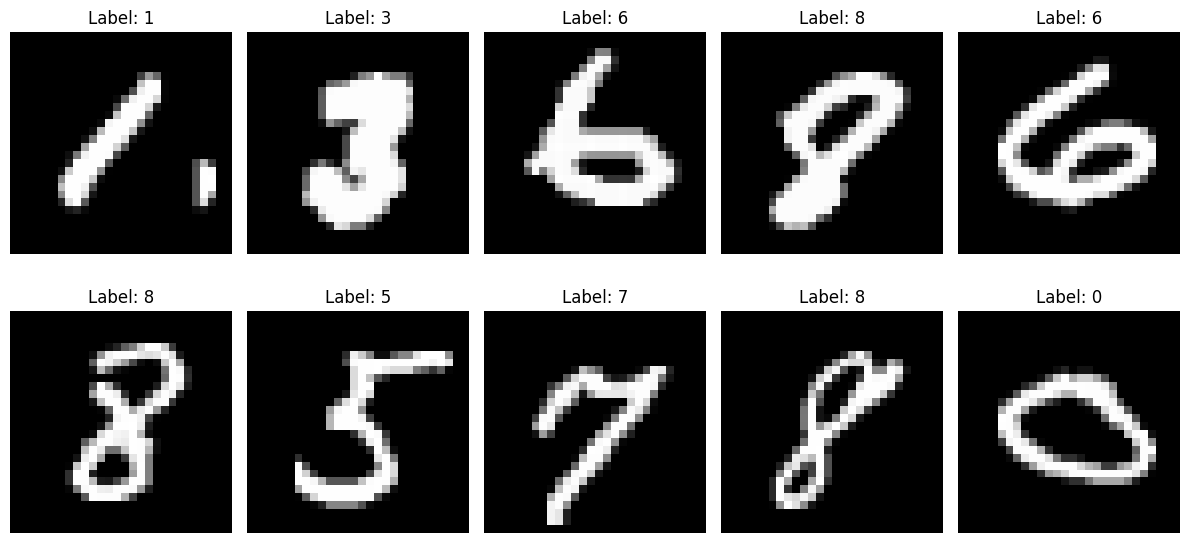

Using device: cpu
Starting training...
Epoch [1/50], Train Loss: 0.064841, Valid Loss: 0.033620
Epoch [2/50], Train Loss: 0.025323, Valid Loss: 0.019645
Epoch [3/50], Train Loss: 0.017304, Valid Loss: 0.015161
Epoch [4/50], Train Loss: 0.013901, Valid Loss: 0.012746
Epoch [5/50], Train Loss: 0.011929, Valid Loss: 0.011106
Epoch [6/50], Train Loss: 0.010600, Valid Loss: 0.010226
Epoch [7/50], Train Loss: 0.009657, Valid Loss: 0.009324
Epoch [8/50], Train Loss: 0.008954, Valid Loss: 0.008656
Epoch [9/50], Train Loss: 0.008365, Valid Loss: 0.008102
Epoch [10/50], Train Loss: 0.007936, Valid Loss: 0.007804
Epoch [11/50], Train Loss: 0.007584, Valid Loss: 0.007597
Epoch [12/50], Train Loss: 0.007299, Valid Loss: 0.007349
Epoch [13/50], Train Loss: 0.007053, Valid Loss: 0.007059
Epoch [14/50], Train Loss: 0.006854, Valid Loss: 0.006867
Epoch [15/50], Train Loss: 0.006671, Valid Loss: 0.006682
Epoch [16/50], Train Loss: 0.006481, Valid Loss: 0.006483
Epoch [17/50], Train Loss: 0.006300, Valid

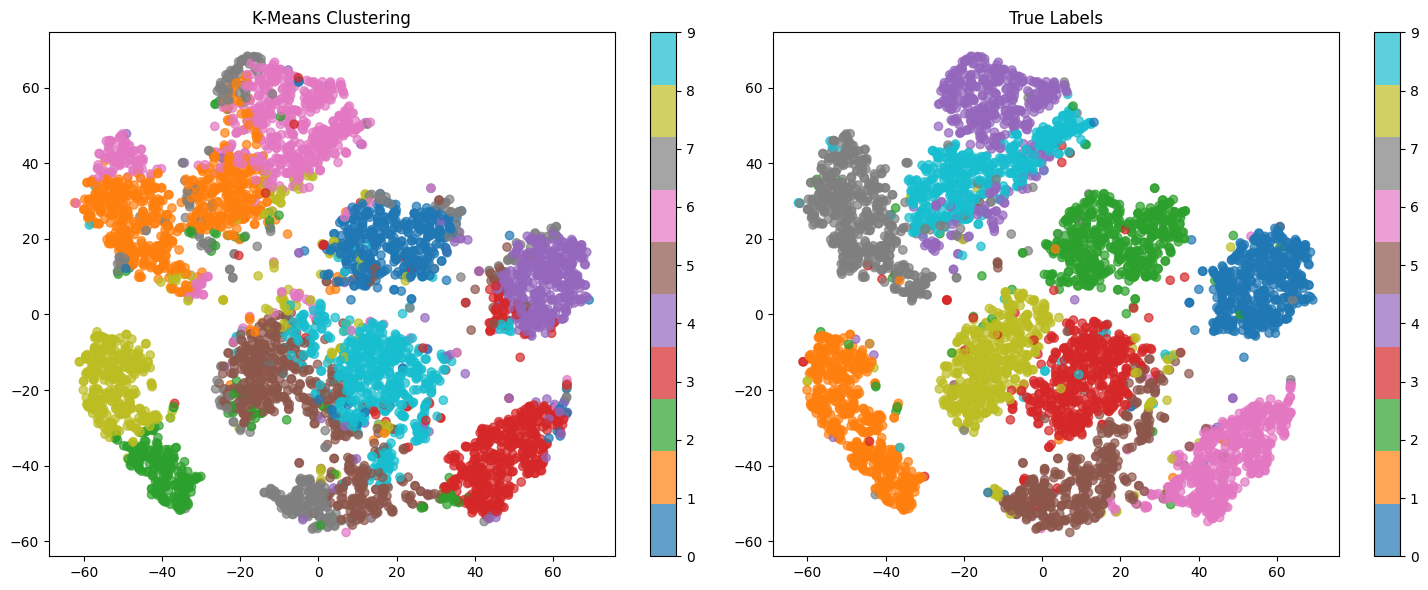

Visualization saved to 'mnist_clustering_comparison.png'


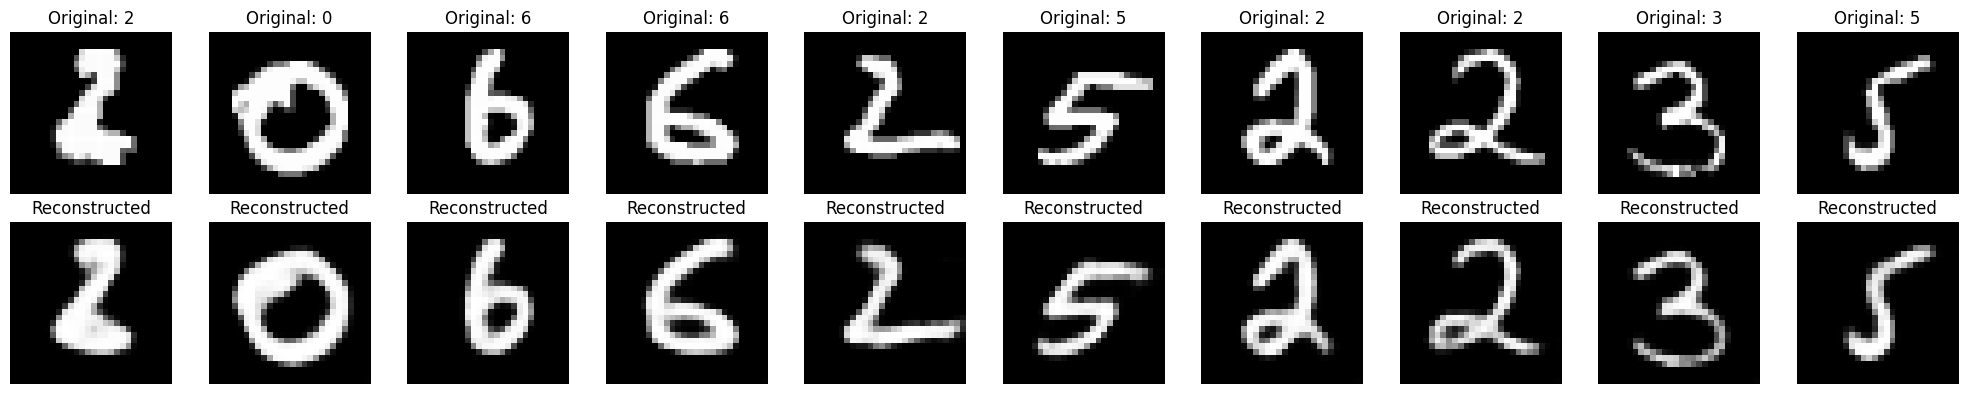

Reconstruction comparison saved to 'mnist_reconstructions.png'


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import io
from PIL import Image

# 1. Load the MNIST dataset from parquet file
print("Loading MNIST dataset from parquet file...")
parquet_path = r"C:\Users\Asif\Downloads\train.parquet"
parquet_data = pq.read_table(parquet_path).to_pandas()

print(f"Parquet file columns: {parquet_data.columns}")
print(f"Number of samples: {len(parquet_data)}")

# 2. Process the image data properly - PNG bytes format
images = []
labels = []

print("Processing image data...")
# Sample the first image to understand its format
sample_img = parquet_data['image'].iloc[0]
print(f"Image type: {type(sample_img)}")
print(f"Dictionary keys: {sample_img.keys()}")

# Extract PNG image data from bytes
print("Extracting images from PNG byte data...")
for i, row in enumerate(parquet_data.itertuples()):
    if i % 1000 == 0:
        print(f"Processing image {i}/{len(parquet_data)}")
    
    # Get bytes data
    img_bytes = row.image['bytes']
    
    # Convert bytes to PIL Image
    img_pil = Image.open(io.BytesIO(img_bytes))
    
    # Convert PIL image to numpy array
    img_array = np.array(img_pil)
    
    # MNIST images are grayscale, but may have different formats
    if len(img_array.shape) == 3 and img_array.shape[2] > 1:
        # Convert RGB to grayscale if needed
        img_array = np.mean(img_array, axis=2).astype(np.uint8)
    
    images.append(img_array)
    labels.append(row.label)

# Stack all image arrays
image_data = np.stack(images)
label_data = np.array(labels)

print(f"Successfully extracted {len(images)} images")
print(f"Image data shape: {image_data.shape}")
print(f"Label data shape: {label_data.shape}")

# Convert to PyTorch tensors
train_images = torch.tensor(image_data, dtype=torch.float32)
train_labels = torch.tensor(label_data, dtype=torch.long)

# Normalize images to [0, 1]
train_images = train_images / 255.0

# Add channel dimension for CNN input [batch, channel, height, width]
train_images = train_images.unsqueeze(1)

print(f"Final tensor shape: {train_images.shape}")

# Split into train and validation sets (80% train, 20% validation)
from sklearn.model_selection import train_test_split
indices = np.arange(len(train_images))
train_idx, valid_idx = train_test_split(indices, test_size=0.2, random_state=42, stratify=label_data)

valid_images = train_images[valid_idx]
valid_labels = train_labels[valid_idx]
train_images = train_images[train_idx]
train_labels = train_labels[train_idx]

print(f"Data loaded successfully.")
print(f"Train set: {len(train_images)} images")
print(f"Validation set: {len(valid_images)} images")

# Create DataLoaders
batch_size = 128
train_dataset = TensorDataset(train_images, train_labels)
valid_dataset = TensorDataset(valid_images, valid_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Visualize some images to confirm they're loaded correctly
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i, 0].numpy(), cmap='gray')
    plt.title(f"Label: {train_labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_samples.png')
plt.show()

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=32):
        super().__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(True),
            nn.Linear(128, latent_dim)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 32 * 7 * 7),
            nn.ReLU(True),
            nn.Unflatten(1, (32, 7, 7)),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # Output normalized to [0, 1]
        )
    
    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon, z

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
print("Starting training...")

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for data, _ in train_loader:
        data = data.to(device)
        
        # Forward pass
        recon, _ = model(data)
        loss = criterion(recon, data)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Validation
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for data, _ in valid_loader:
            data = data.to(device)
            recon, _ = model(data)
            loss = criterion(recon, data)
            valid_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss/len(train_loader):.6f}, "
          f"Valid Loss: {valid_loss/len(valid_loader):.6f}")

print("Training complete!")

# Extract embeddings for clustering
def extract_embeddings(dataloader, model):
    model.eval()
    embeddings = []
    labels = []
    
    with torch.no_grad():
        for data, target in dataloader:
            data = data.to(device)
            _, z = model(data)
            embeddings.append(z.cpu().numpy())
            labels.append(target.numpy())
    
    return np.vstack(embeddings), np.concatenate(labels)

print("Extracting embeddings...")
embeddings, true_labels = extract_embeddings(train_loader, model)
print(f"Embeddings shape: {embeddings.shape}")

# K-Means clustering
n_clusters = 10  # MNIST has 10 classes
print(f"Performing K-Means clustering with {n_clusters} clusters...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(embeddings)

# Evaluate clustering metrics
silhouette = silhouette_score(embeddings, cluster_labels)
davies_bouldin = davies_bouldin_score(embeddings, cluster_labels)
calinski_harabasz = calinski_harabasz_score(embeddings, cluster_labels)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

# Visualize with t-SNE
print("Generating t-SNE visualization...")
# Use a subset for faster visualization
subset_size = min(5000, len(embeddings))
subset_indices = np.random.choice(len(embeddings), subset_size, replace=False)

tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings[subset_indices])

# Compare clusters with true labels
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot clustering results
scatter1 = axes[0].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                          c=cluster_labels[subset_indices], cmap='tab10', alpha=0.7)
axes[0].set_title("K-Means Clustering")
plt.colorbar(scatter1, ax=axes[0])

# Plot true labels
scatter2 = axes[1].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                          c=true_labels[subset_indices], cmap='tab10', alpha=0.7)
axes[1].set_title("True Labels")
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.savefig('mnist_clustering_comparison.png')
plt.show()

print("Visualization saved to 'mnist_clustering_comparison.png'")

# Show some original vs reconstructed images
def show_reconstruction(n=10):
    model.eval()
    with torch.no_grad():
        # Get random samples
        idx = np.random.choice(len(valid_images), n, replace=False)
        test_images = valid_images[idx].to(device)
        
        # Get reconstructions
        recon_images, _ = model(test_images)
        
        # Display
        plt.figure(figsize=(n*2, 4))
        for i in range(n):
            # Original
            plt.subplot(2, n, i+1)
            plt.imshow(test_images[i].cpu().squeeze().numpy(), cmap='gray')
            plt.title(f"Original: {valid_labels[idx[i]].item()}")
            plt.axis('off')
            
            # Reconstruction
            plt.subplot(2, n, i+n+1)
            plt.imshow(recon_images[i].cpu().squeeze().numpy(), cmap='gray')
            plt.title(f"Reconstructed")
            plt.axis('off')
        
        plt.tight_layout()
        plt.savefig('mnist_reconstructions.png')
        plt.show()

show_reconstruction()
print("Reconstruction comparison saved to 'mnist_reconstructions.png'")

Loading MNIST dataset from parquet file...
Parquet file columns: Index(['image', 'label'], dtype='object')
Number of samples: 60000
Processing image data...
Image type: <class 'dict'>
Dictionary keys: dict_keys(['bytes', 'path'])
Extracting images from PNG byte data...
Processing image 0/60000
Processing image 1000/60000
Processing image 2000/60000
Processing image 3000/60000
Processing image 4000/60000
Processing image 5000/60000
Processing image 6000/60000
Processing image 7000/60000
Processing image 8000/60000
Processing image 9000/60000
Processing image 10000/60000
Processing image 11000/60000
Processing image 12000/60000
Processing image 13000/60000
Processing image 14000/60000
Processing image 15000/60000
Processing image 16000/60000
Processing image 17000/60000
Processing image 18000/60000
Processing image 19000/60000
Processing image 20000/60000
Processing image 21000/60000
Processing image 22000/60000
Processing image 23000/60000
Processing image 24000/60000
Processing image 2

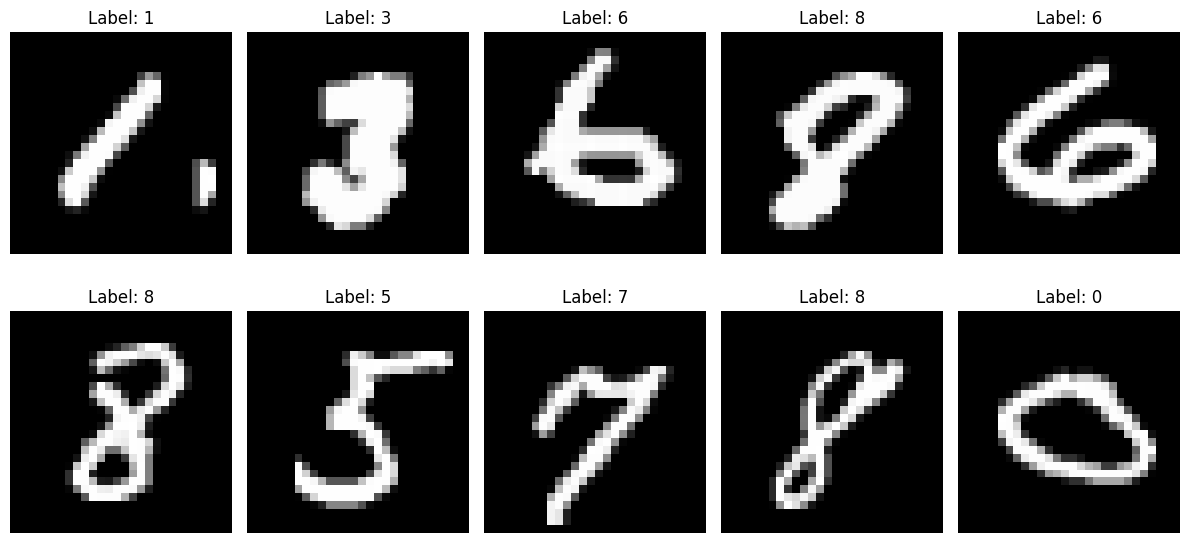

Using device: cpu
Starting training...
Epoch [1/10], Train Loss: 0.026814, Valid Loss: 0.015630
Epoch [2/10], Train Loss: 0.015998, Valid Loss: 0.013800
Epoch [3/10], Train Loss: 0.014640, Valid Loss: 0.013345
Epoch [4/10], Train Loss: 0.013880, Valid Loss: 0.012342
Epoch [5/10], Train Loss: 0.013349, Valid Loss: 0.012412
Epoch [6/10], Train Loss: 0.012986, Valid Loss: 0.011886
Epoch [7/10], Train Loss: 0.012707, Valid Loss: 0.011494
Epoch [8/10], Train Loss: 0.012453, Valid Loss: 0.011123
Epoch [9/10], Train Loss: 0.012193, Valid Loss: 0.011119
Epoch [10/10], Train Loss: 0.012039, Valid Loss: 0.010924
Training complete!
Extracting embeddings...
Embeddings shape: (48000, 10)
Performing K-Means clustering with 10 clusters...
Silhouette Score: 0.1380
Davies-Bouldin Index: 1.7991
Calinski-Harabasz Index: 4179.7773
Generating t-SNE visualization...


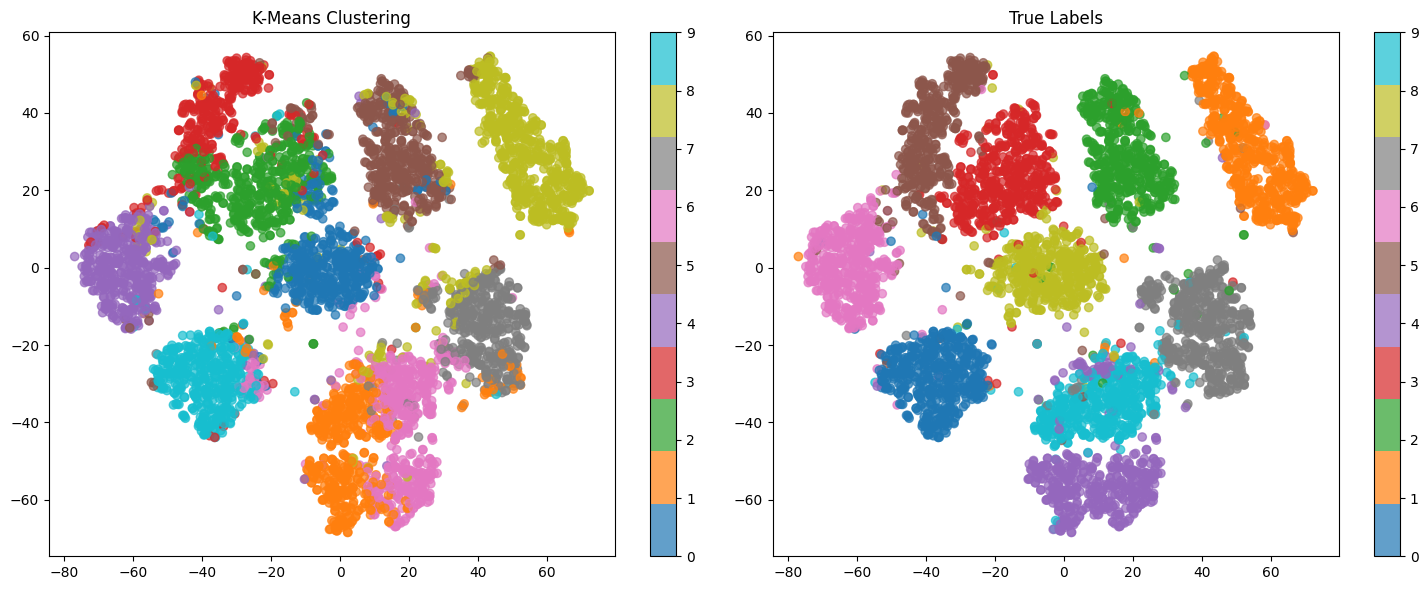

Visualization saved to 'mnist_clustering_comparison2.png'


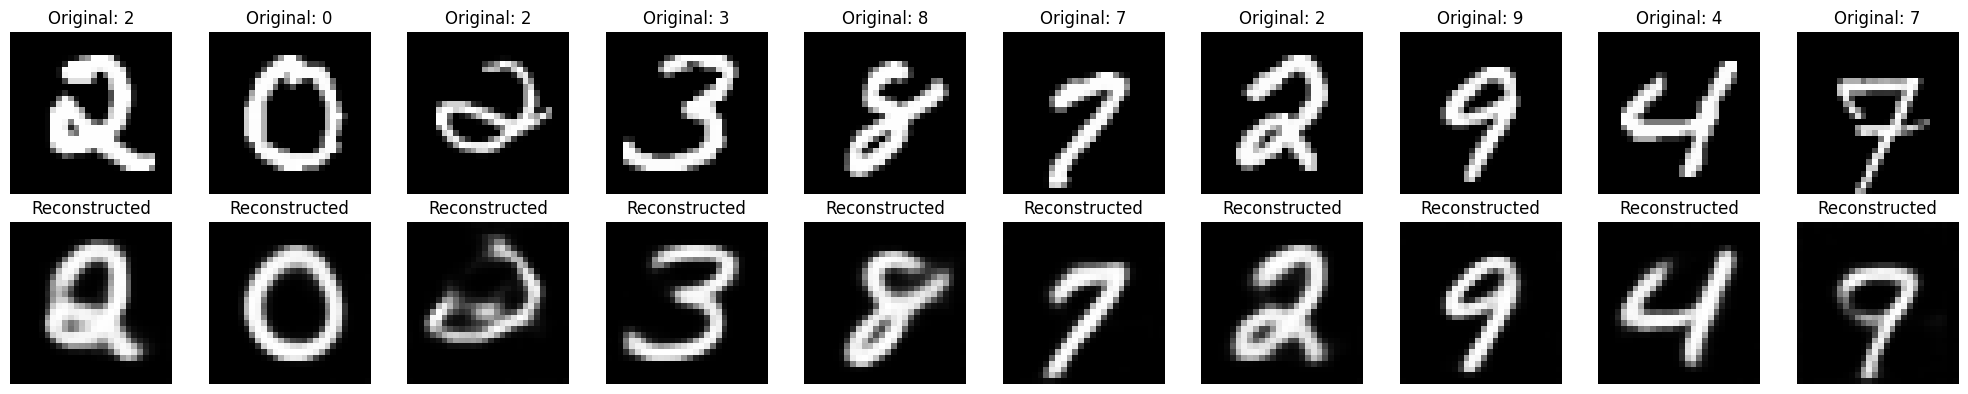

Reconstruction comparison saved to 'mnist_reconstructions2.png'


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import io
from PIL import Image

# 1. Load the MNIST dataset from parquet file
print("Loading MNIST dataset from parquet file...")
parquet_path = r"C:\Users\Asif\Downloads\train.parquet"
parquet_data = pq.read_table(parquet_path).to_pandas()

print(f"Parquet file columns: {parquet_data.columns}")
print(f"Number of samples: {len(parquet_data)}")

# 2. Process the image data properly - PNG bytes format
images = []
labels = []

print("Processing image data...")
# Sample the first image to understand its format
sample_img = parquet_data['image'].iloc[0]
print(f"Image type: {type(sample_img)}")
print(f"Dictionary keys: {sample_img.keys()}")

# Extract PNG image data from bytes
print("Extracting images from PNG byte data...")
for i, row in enumerate(parquet_data.itertuples()):
    if i % 1000 == 0:
        print(f"Processing image {i}/{len(parquet_data)}")
    
    # Get bytes data
    img_bytes = row.image['bytes']
    
    # Convert bytes to PIL Image
    img_pil = Image.open(io.BytesIO(img_bytes))
    
    # Convert PIL image to numpy array
    img_array = np.array(img_pil)
    
    # MNIST images are grayscale, but may have different formats
    if len(img_array.shape) == 3 and img_array.shape[2] > 1:
        # Convert RGB to grayscale if needed
        img_array = np.mean(img_array, axis=2).astype(np.uint8)
    
    images.append(img_array)
    labels.append(row.label)

# Stack all image arrays
image_data = np.stack(images)
label_data = np.array(labels)

print(f"Successfully extracted {len(images)} images")
print(f"Image data shape: {image_data.shape}")
print(f"Label data shape: {label_data.shape}")

# Convert to PyTorch tensors
train_images = torch.tensor(image_data, dtype=torch.float32)
train_labels = torch.tensor(label_data, dtype=torch.long)

# Normalize images to [0, 1]
train_images = train_images / 255.0

# Add channel dimension for CNN input [batch, channel, height, width]
train_images = train_images.unsqueeze(1)

print(f"Final tensor shape: {train_images.shape}")

# Split into train and validation sets (80% train, 20% validation)
from sklearn.model_selection import train_test_split
indices = np.arange(len(train_images))
train_idx, valid_idx = train_test_split(indices, test_size=0.2, random_state=42, stratify=label_data)

valid_images = train_images[valid_idx]
valid_labels = train_labels[valid_idx]
train_images = train_images[train_idx]
train_labels = train_labels[train_idx]

print(f"Data loaded successfully.")
print(f"Train set: {len(train_images)} images")
print(f"Validation set: {len(valid_images)} images")

# Create DataLoaders
batch_size = 128
train_dataset = TensorDataset(train_images, train_labels)
valid_dataset = TensorDataset(valid_images, valid_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Visualize some images to confirm they're loaded correctly
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i, 0].numpy(), cmap='gray')
    plt.title(f"Label: {train_labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_samples2.png')
plt.show()

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=10):  # Reduced from 32 to 10 to match number of classes
        super().__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # Increased filters
            nn.BatchNorm2d(32),  # Added batch normalization
            nn.LeakyReLU(0.2),  # Using LeakyReLU
            nn.MaxPool2d(2, stride=2),  # 14x14
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, stride=2),  # 7x7
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # Added layer
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.2),  # Added dropout
            nn.Linear(256, latent_dim)
        )
        
        # Decoder with corresponding changes
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128 * 7 * 7),
            nn.LeakyReLU(0.2),
            nn.Unflatten(1, (128, 7, 7)),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            nn.Conv2d(32, 1, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon, z

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
print("Starting training...")

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for data, _ in train_loader:
        data = data.to(device)
        
        # Forward pass
        recon, _ = model(data)
        loss = criterion(recon, data)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Validation
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for data, _ in valid_loader:
            data = data.to(device)
            recon, _ = model(data)
            loss = criterion(recon, data)
            valid_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss/len(train_loader):.6f}, "
          f"Valid Loss: {valid_loss/len(valid_loader):.6f}")

print("Training complete!")

# Extract embeddings for clustering
def extract_embeddings(dataloader, model):
    model.eval()
    embeddings = []
    labels = []
    
    with torch.no_grad():
        for data, target in dataloader:
            data = data.to(device)
            _, z = model(data)
            embeddings.append(z.cpu().numpy())
            labels.append(target.numpy())
    
    return np.vstack(embeddings), np.concatenate(labels)

print("Extracting embeddings...")
embeddings, true_labels = extract_embeddings(train_loader, model)
print(f"Embeddings shape: {embeddings.shape}")

# K-Means clustering
n_clusters = 10  # MNIST has 10 classes
print(f"Performing K-Means clustering with {n_clusters} clusters...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(embeddings)

# Evaluate clustering metrics
silhouette = silhouette_score(embeddings, cluster_labels)
davies_bouldin = davies_bouldin_score(embeddings, cluster_labels)
calinski_harabasz = calinski_harabasz_score(embeddings, cluster_labels)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

# Visualize with t-SNE
print("Generating t-SNE visualization...")
# Use a subset for faster visualization
subset_size = min(5000, len(embeddings))
subset_indices = np.random.choice(len(embeddings), subset_size, replace=False)

tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings[subset_indices])

# Compare clusters with true labels
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot clustering results
scatter1 = axes[0].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                          c=cluster_labels[subset_indices], cmap='tab10', alpha=0.7)
axes[0].set_title("K-Means Clustering")
plt.colorbar(scatter1, ax=axes[0])

# Plot true labels
scatter2 = axes[1].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                          c=true_labels[subset_indices], cmap='tab10', alpha=0.7)
axes[1].set_title("True Labels")
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.savefig('mnist_clustering_comparison2.png')
plt.show()

print("Visualization saved to 'mnist_clustering_comparison2.png'")

# Show some original vs reconstructed images
def show_reconstruction(n=10):
    model.eval()
    with torch.no_grad():
        # Get random samples
        idx = np.random.choice(len(valid_images), n, replace=False)
        test_images = valid_images[idx].to(device)
        
        # Get reconstructions
        recon_images, _ = model(test_images)
        
        # Display
        plt.figure(figsize=(n*2, 4))
        for i in range(n):
            # Original
            plt.subplot(2, n, i+1)
            plt.imshow(test_images[i].cpu().squeeze().numpy(), cmap='gray')
            plt.title(f"Original: {valid_labels[idx[i]].item()}")
            plt.axis('off')
            
            # Reconstruction
            plt.subplot(2, n, i+n+1)
            plt.imshow(recon_images[i].cpu().squeeze().numpy(), cmap='gray')
            plt.title(f"Reconstructed")
            plt.axis('off')
        
        plt.tight_layout()
        plt.savefig('mnist_reconstructions2.png')
        plt.show()

show_reconstruction()
print("Reconstruction comparison saved to 'mnist_reconstructions2.png'")

Loading MNIST dataset from parquet file...
Parquet file columns: Index(['image', 'label'], dtype='object')
Number of samples: 60000
Processing image data...
Image type: <class 'dict'>
Dictionary keys: dict_keys(['bytes', 'path'])
Extracting images from PNG byte data...
Processing image 0/60000
Processing image 1000/60000
Processing image 2000/60000
Processing image 3000/60000
Processing image 4000/60000
Processing image 5000/60000
Processing image 6000/60000
Processing image 7000/60000
Processing image 8000/60000
Processing image 9000/60000
Processing image 10000/60000
Processing image 11000/60000
Processing image 12000/60000
Processing image 13000/60000
Processing image 14000/60000
Processing image 15000/60000
Processing image 16000/60000
Processing image 17000/60000
Processing image 18000/60000
Processing image 19000/60000
Processing image 20000/60000
Processing image 21000/60000
Processing image 22000/60000
Processing image 23000/60000
Processing image 24000/60000
Processing image 2

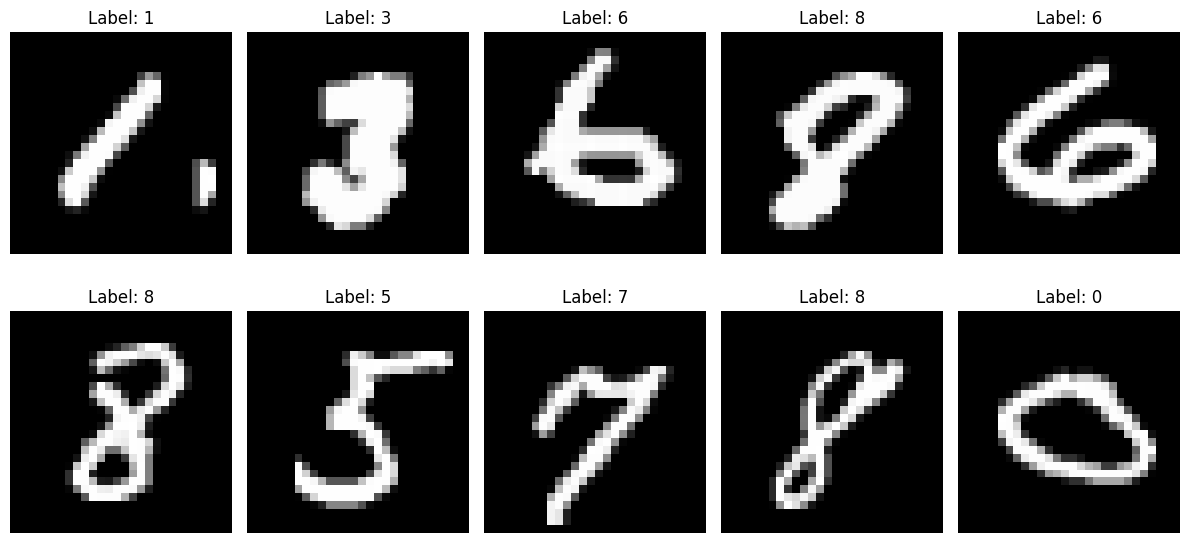

Using device: cpu
Starting training...
Epoch [1/10], Train Loss: 0.029568, Valid Loss: 0.016319
Epoch [2/10], Train Loss: 0.015420, Valid Loss: 0.013797
Epoch [3/10], Train Loss: 0.013799, Valid Loss: 0.012607
Epoch [4/10], Train Loss: 0.013014, Valid Loss: 0.011707
Epoch [5/10], Train Loss: 0.012459, Valid Loss: 0.011547
Epoch [6/10], Train Loss: 0.011995, Valid Loss: 0.011499
Epoch [7/10], Train Loss: 0.011721, Valid Loss: 0.010812
Epoch [8/10], Train Loss: 0.011434, Valid Loss: 0.010744
Epoch [9/10], Train Loss: 0.011142, Valid Loss: 0.010619
Epoch [10/10], Train Loss: 0.010922, Valid Loss: 0.010335
Training complete!
Extracting embeddings...
Embeddings shape: (48000, 10)
Performing K-Means clustering with 10 clusters...
Silhouette Score: 0.1797
Davies-Bouldin Index: 1.6242
Calinski-Harabasz Index: 5351.5991
Generating t-SNE visualization...


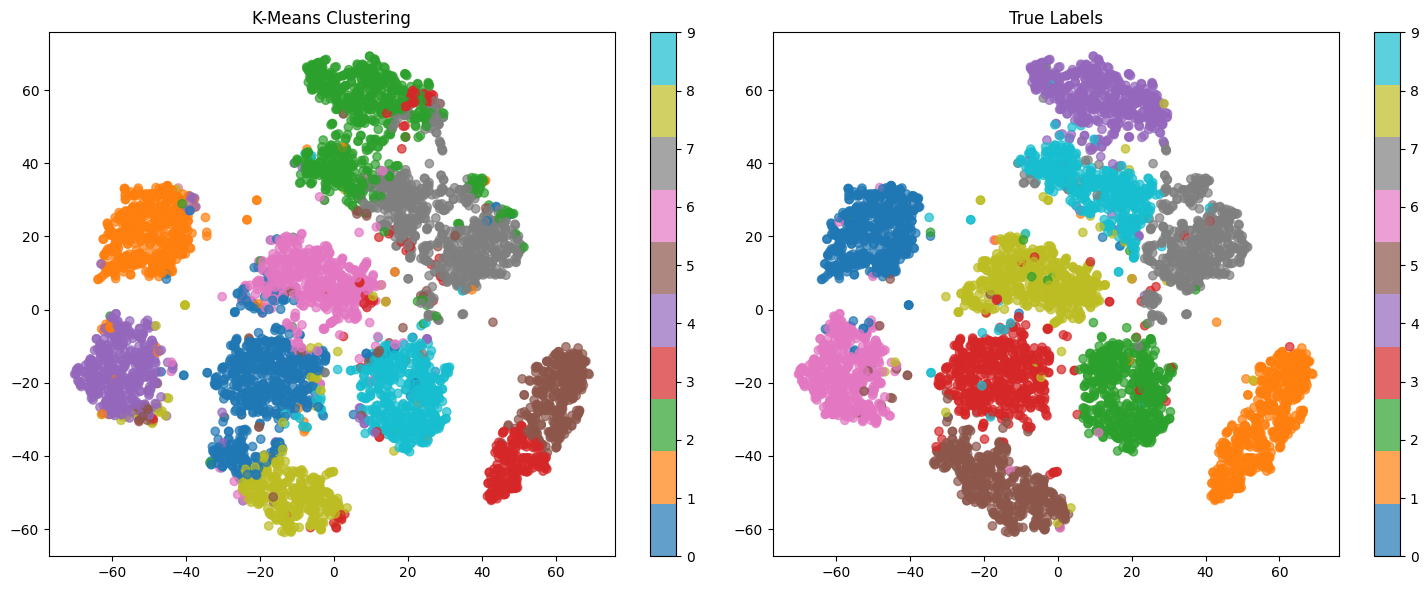

Visualization saved to 'mnist_clustering_comparison2.png'


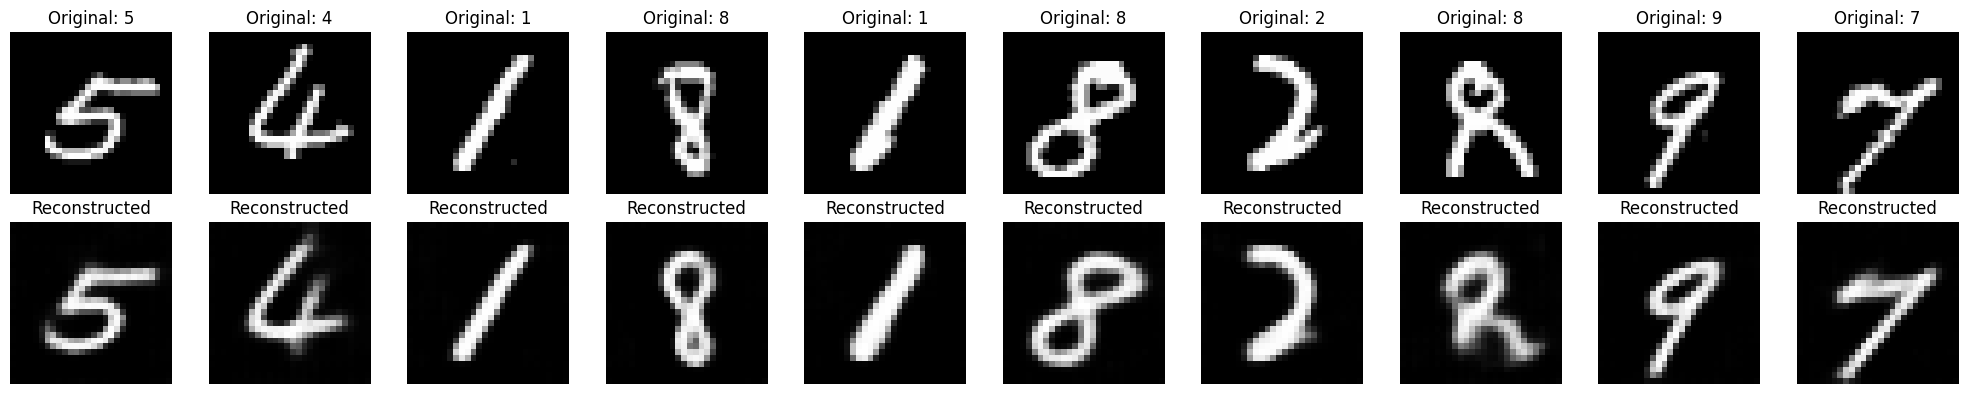

Reconstruction comparison saved to 'mnist_reconstructions2.png'


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import io
from PIL import Image

# 1. Load the MNIST dataset from parquet file
print("Loading MNIST dataset from parquet file...")
parquet_path = r"C:\Users\Asif\Downloads\train.parquet"
parquet_data = pq.read_table(parquet_path).to_pandas()

print(f"Parquet file columns: {parquet_data.columns}")
print(f"Number of samples: {len(parquet_data)}")

# 2. Process the image data properly - PNG bytes format
images = []
labels = []

print("Processing image data...")
# Sample the first image to understand its format
sample_img = parquet_data['image'].iloc[0]
print(f"Image type: {type(sample_img)}")
print(f"Dictionary keys: {sample_img.keys()}")

# Extract PNG image data from bytes
print("Extracting images from PNG byte data...")
for i, row in enumerate(parquet_data.itertuples()):
    if i % 1000 == 0:
        print(f"Processing image {i}/{len(parquet_data)}")
    
    # Get bytes data
    img_bytes = row.image['bytes']
    
    # Convert bytes to PIL Image
    img_pil = Image.open(io.BytesIO(img_bytes))
    
    # Convert PIL image to numpy array
    img_array = np.array(img_pil)
    
    # MNIST images are grayscale, but may have different formats
    if len(img_array.shape) == 3 and img_array.shape[2] > 1:
        # Convert RGB to grayscale if needed
        img_array = np.mean(img_array, axis=2).astype(np.uint8)
    
    images.append(img_array)
    labels.append(row.label)

# Stack all image arrays
image_data = np.stack(images)
label_data = np.array(labels)

print(f"Successfully extracted {len(images)} images")
print(f"Image data shape: {image_data.shape}")
print(f"Label data shape: {label_data.shape}")

# Convert to PyTorch tensors
train_images = torch.tensor(image_data, dtype=torch.float32)
train_labels = torch.tensor(label_data, dtype=torch.long)

# Normalize images to [0, 1]
train_images = train_images / 255.0

# Add channel dimension for CNN input [batch, channel, height, width]
train_images = train_images.unsqueeze(1)

print(f"Final tensor shape: {train_images.shape}")

# Split into train and validation sets (80% train, 20% validation)
from sklearn.model_selection import train_test_split
indices = np.arange(len(train_images))
train_idx, valid_idx = train_test_split(indices, test_size=0.2, random_state=42, stratify=label_data)

valid_images = train_images[valid_idx]
valid_labels = train_labels[valid_idx]
train_images = train_images[train_idx]
train_labels = train_labels[train_idx]

print(f"Data loaded successfully.")
print(f"Train set: {len(train_images)} images")
print(f"Validation set: {len(valid_images)} images")

# Create DataLoaders
batch_size = 128
train_dataset = TensorDataset(train_images, train_labels)
valid_dataset = TensorDataset(valid_images, valid_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Visualize some images to confirm they're loaded correctly
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i, 0].numpy(), cmap='gray')
    plt.title(f"Label: {train_labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_samples2.png')
plt.show()

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=10):  # Reduced from 32 to 10 to match number of classes
        super().__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # 14x14
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # 7x7
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(True),
            nn.Linear(256, latent_dim)
        )
        
        # Decoder with corresponding changes
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(True),
            
            nn.Linear(256, 128 * 7 * 7),
            nn.BatchNorm1d(128 * 7 * 7),
            nn.ReLU(True),
            
            nn.Unflatten(1, (128, 7, 7)),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
            
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon, z

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
print("Starting training...")

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for data, _ in train_loader:
        data = data.to(device)
        
        # Forward pass
        recon, _ = model(data)
        loss = criterion(recon, data)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Validation
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for data, _ in valid_loader:
            data = data.to(device)
            recon, _ = model(data)
            loss = criterion(recon, data)
            valid_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss/len(train_loader):.6f}, "
          f"Valid Loss: {valid_loss/len(valid_loader):.6f}")

print("Training complete!")

# Extract embeddings for clustering
def extract_embeddings(dataloader, model):
    model.eval()
    embeddings = []
    labels = []
    
    with torch.no_grad():
        for data, target in dataloader:
            data = data.to(device)
            _, z = model(data)
            embeddings.append(z.cpu().numpy())
            labels.append(target.numpy())
    
    return np.vstack(embeddings), np.concatenate(labels)

print("Extracting embeddings...")
embeddings, true_labels = extract_embeddings(train_loader, model)
print(f"Embeddings shape: {embeddings.shape}")

# K-Means clustering
n_clusters = 10  # MNIST has 10 classes
print(f"Performing K-Means clustering with {n_clusters} clusters...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(embeddings)

# Evaluate clustering metrics
silhouette = silhouette_score(embeddings, cluster_labels)
davies_bouldin = davies_bouldin_score(embeddings, cluster_labels)
calinski_harabasz = calinski_harabasz_score(embeddings, cluster_labels)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

# Visualize with t-SNE
print("Generating t-SNE visualization...")
# Use a subset for faster visualization
subset_size = min(5000, len(embeddings))
subset_indices = np.random.choice(len(embeddings), subset_size, replace=False)

tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings[subset_indices])

# Compare clusters with true labels
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot clustering results
scatter1 = axes[0].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                          c=cluster_labels[subset_indices], cmap='tab10', alpha=0.7)
axes[0].set_title("K-Means Clustering")
plt.colorbar(scatter1, ax=axes[0])

# Plot true labels
scatter2 = axes[1].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                          c=true_labels[subset_indices], cmap='tab10', alpha=0.7)
axes[1].set_title("True Labels")
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.savefig('mnist_clustering_comparison2.png')
plt.show()

print("Visualization saved to 'mnist_clustering_comparison2.png'")

# Show some original vs reconstructed images
def show_reconstruction(n=10):
    model.eval()
    with torch.no_grad():
        # Get random samples
        idx = np.random.choice(len(valid_images), n, replace=False)
        test_images = valid_images[idx].to(device)
        
        # Get reconstructions
        recon_images, _ = model(test_images)
        
        # Display
        plt.figure(figsize=(n*2, 4))
        for i in range(n):
            # Original
            plt.subplot(2, n, i+1)
            plt.imshow(test_images[i].cpu().squeeze().numpy(), cmap='gray')
            plt.title(f"Original: {valid_labels[idx[i]].item()}")
            plt.axis('off')
            
            # Reconstruction
            plt.subplot(2, n, i+n+1)
            plt.imshow(recon_images[i].cpu().squeeze().numpy(), cmap='gray')
            plt.title(f"Reconstructed")
            plt.axis('off')
        
        plt.tight_layout()
        plt.savefig('mnist_reconstructions2.png')
        plt.show()

show_reconstruction()
print("Reconstruction comparison saved to 'mnist_reconstructions2.png'")

Loading MNIST dataset from parquet file...
Parquet file columns: Index(['image', 'label'], dtype='object')
Number of samples: 60000
Processing image data...
Image type: <class 'dict'>
Dictionary keys: dict_keys(['bytes', 'path'])
Extracting images from PNG byte data...
Processing image 0/60000
Processing image 1000/60000
Processing image 2000/60000
Processing image 3000/60000
Processing image 4000/60000
Processing image 5000/60000
Processing image 6000/60000
Processing image 7000/60000
Processing image 8000/60000
Processing image 9000/60000
Processing image 10000/60000
Processing image 11000/60000
Processing image 12000/60000
Processing image 13000/60000
Processing image 14000/60000
Processing image 15000/60000
Processing image 16000/60000
Processing image 17000/60000
Processing image 18000/60000
Processing image 19000/60000
Processing image 20000/60000
Processing image 21000/60000
Processing image 22000/60000
Processing image 23000/60000
Processing image 24000/60000
Processing image 2

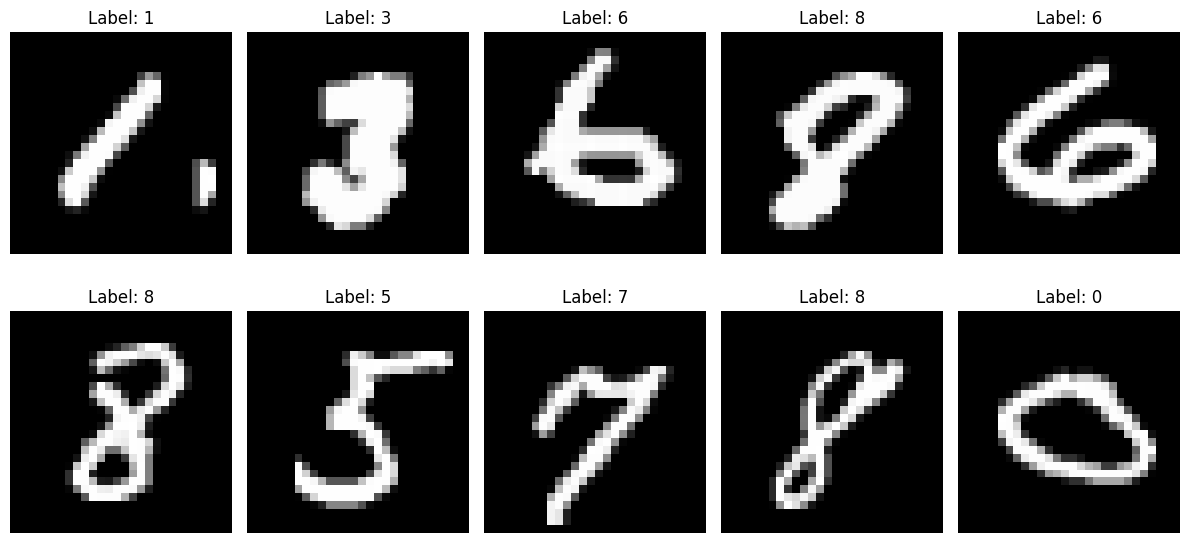

Using device: cpu
Epoch [1/10], Train Loss: 0.735637, Valid Loss: 0.708549
Epoch [2/10], Train Loss: 0.697213, Valid Loss: 0.695460
Epoch [3/10], Train Loss: 0.690937, Valid Loss: 0.691586
Epoch [4/10], Train Loss: 0.687405, Valid Loss: 0.688091
Epoch [5/10], Train Loss: 0.684745, Valid Loss: 0.686275
Epoch [6/10], Train Loss: 0.682638, Valid Loss: 0.686059
Epoch [7/10], Train Loss: 0.681598, Valid Loss: 0.684879
Epoch [8/10], Train Loss: 0.680225, Valid Loss: 0.683481
Epoch [9/10], Train Loss: 0.679149, Valid Loss: 0.684570
Epoch [10/10], Train Loss: 0.678842, Valid Loss: 0.682378
Extracting embeddings...
Embeddings shape: (48000, 10)
Performing improved clustering...
K-Means with 8 clusters - Silhouette Score: 0.5716
K-Means with 9 clusters - Silhouette Score: 0.6407
K-Means with 10 clusters - Silhouette Score: 0.6892
K-Means with 11 clusters - Silhouette Score: 0.6562
K-Means with 12 clusters - Silhouette Score: 0.6306

Best number of clusters: 10
Final Silhouette Score: 0.6892
Davi

c:\Users\Asif\Documents\my_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


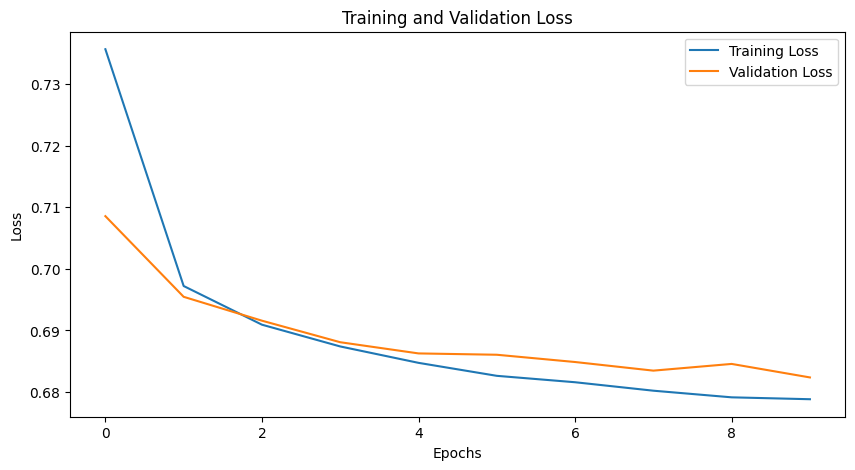

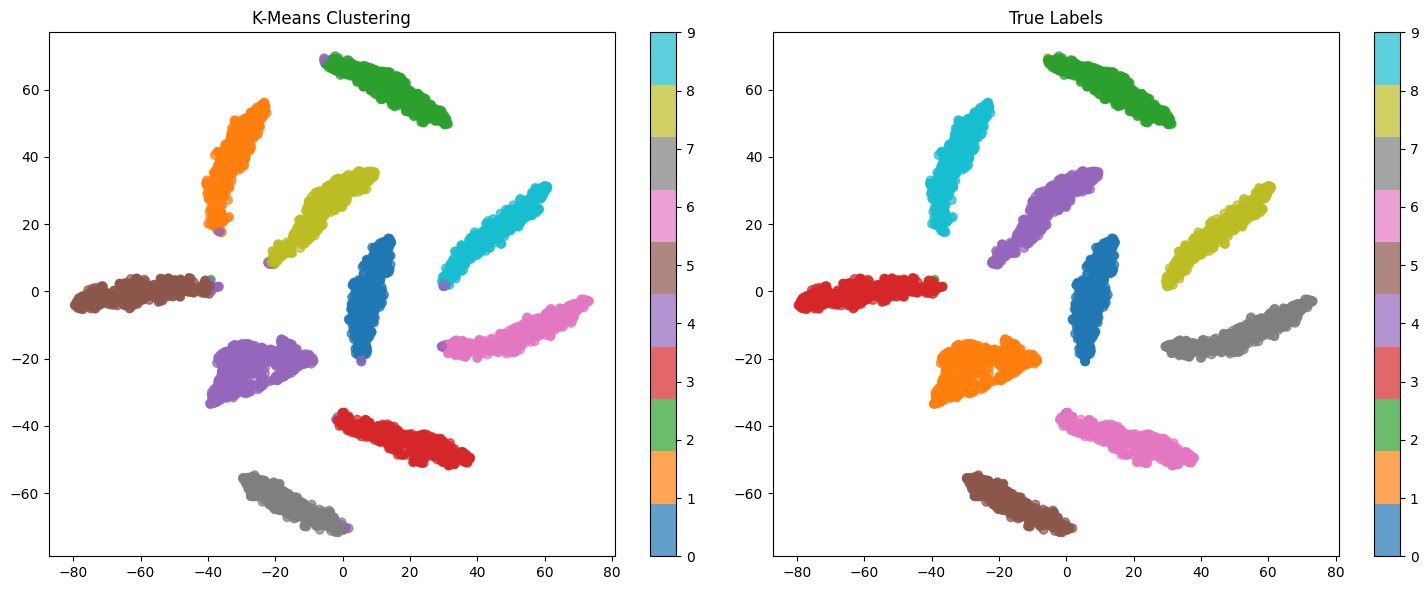

Visualization saved to 'enhanced_mnist_clustering.png'


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import io
from PIL import Image

# 1. Load the MNIST dataset from parquet file
print("Loading MNIST dataset from parquet file...")
parquet_path = r"C:\Users\Asif\Downloads\train.parquet"
parquet_data = pq.read_table(parquet_path).to_pandas()

print(f"Parquet file columns: {parquet_data.columns}")
print(f"Number of samples: {len(parquet_data)}")

# 2. Process the image data properly - PNG bytes format
images = []
labels = []

print("Processing image data...")
# Sample the first image to understand its format
sample_img = parquet_data['image'].iloc[0]
print(f"Image type: {type(sample_img)}")
print(f"Dictionary keys: {sample_img.keys()}")

# Extract PNG image data from bytes
print("Extracting images from PNG byte data...")
for i, row in enumerate(parquet_data.itertuples()):
    if i % 1000 == 0:
        print(f"Processing image {i}/{len(parquet_data)}")
    
    # Get bytes data
    img_bytes = row.image['bytes']
    
    # Convert bytes to PIL Image
    img_pil = Image.open(io.BytesIO(img_bytes))
    
    # Convert PIL image to numpy array
    img_array = np.array(img_pil)
    
    # MNIST images are grayscale, but may have different formats
    if len(img_array.shape) == 3 and img_array.shape[2] > 1:
        # Convert RGB to grayscale if needed
        img_array = np.mean(img_array, axis=2).astype(np.uint8)
    
    images.append(img_array)
    labels.append(row.label)

# Stack all image arrays
image_data = np.stack(images)
label_data = np.array(labels)

print(f"Successfully extracted {len(images)} images")
print(f"Image data shape: {image_data.shape}")
print(f"Label data shape: {label_data.shape}")

# Convert to PyTorch tensors
train_images = torch.tensor(image_data, dtype=torch.float32)
train_labels = torch.tensor(label_data, dtype=torch.long)

# Normalize images to [0, 1]
train_images = train_images / 255.0

# Add channel dimension for CNN input [batch, channel, height, width]
train_images = train_images.unsqueeze(1)

print(f"Final tensor shape: {train_images.shape}")

# Split into train and validation sets (80% train, 20% validation)
from sklearn.model_selection import train_test_split
indices = np.arange(len(train_images))
train_idx, valid_idx = train_test_split(indices, test_size=0.2, random_state=42, stratify=label_data)

valid_images = train_images[valid_idx]
valid_labels = train_labels[valid_idx]
train_images = train_images[train_idx]
train_labels = train_labels[train_idx]

print(f"Data loaded successfully.")
print(f"Train set: {len(train_images)} images")
print(f"Validation set: {len(valid_images)} images")

# Create DataLoaders
batch_size = 128
train_dataset = TensorDataset(train_images, train_labels)
valid_dataset = TensorDataset(valid_images, valid_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Visualize some images to confirm they're loaded correctly
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i, 0].numpy(), cmap='gray')
    plt.title(f"Label: {train_labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_samples22.png')
plt.show()

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

# Enhanced autoencoder with improved architecture
class EnhancedAutoencoder(nn.Module):
    def __init__(self, latent_dim=10):
        super().__init__()
        self.latent_dim = latent_dim
        
        # Encoder with more filters and batch normalization
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, stride=2),  # 14x14
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, stride=2),  # 7x7
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, latent_dim)
        )
        
        # Decoder with corresponding structure
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 64 * 7 * 7),
            nn.BatchNorm1d(64 * 7 * 7),
            nn.LeakyReLU(0.2),
            nn.Unflatten(1, (64, 7, 7)),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon, z

# Contrastive loss for better feature learning
def contrastive_loss(embeddings, labels, temperature=0.5):
    batch_size = embeddings.size(0)
    labels = labels.contiguous().view(-1, 1)
    
    # Create mask for positive pairs
    mask = torch.eq(labels, labels.T).float()
    mask = mask.fill_diagonal_(0)
    
    # Normalize embeddings
    embeddings_normalized = F.normalize(embeddings, p=2, dim=1)
    
    # Compute similarity matrix
    logits = torch.matmul(embeddings_normalized, embeddings_normalized.T) / temperature
    logits = logits - torch.max(logits, dim=1, keepdim=True)[0]  # For numerical stability
    
    # Compute log_prob
    exp_logits = torch.exp(logits)
    log_prob = logits - torch.log(exp_logits.sum(dim=1, keepdim=True))
    
    # Compute mean of log-likelihood over positive pairs
    mean_log_prob_pos = (mask * log_prob).sum(1) / mask.sum(1).clamp(min=1e-8)
    
    return -mean_log_prob_pos.mean()

# Modified training function with combined loss
def train_enhanced_model(model, train_loader, valid_loader, epochs=30, alpha=0.8, beta=0.2):
    device = next(model.parameters()).device
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5
    )
    
    recon_criterion = nn.MSELoss()
    train_losses = []
    valid_losses = []
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            
            # Forward pass
            recon, z = model(data)
            
            # Compute losses
            rec_loss = recon_criterion(recon, data)
            cont_loss = contrastive_loss(z, labels)
            loss = alpha * rec_loss + beta * cont_loss
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation
        model.eval()
        valid_loss = 0
        with torch.no_grad():
            for data, labels in valid_loader:
                data, labels = data.to(device), labels.to(device)
                recon, z = model(data)
                
                rec_loss = recon_criterion(recon, data)
                cont_loss = contrastive_loss(z, labels)
                loss = alpha * rec_loss + beta * cont_loss
                
                valid_loss += loss.item()
        
        train_loss /= len(train_loader)
        valid_loss /= len(valid_loader)
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        
        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {train_loss:.6f}, "
              f"Valid Loss: {valid_loss:.6f}")
        
        # Learning rate scheduling
        scheduler.step(valid_loss)
    
    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.savefig('enhanced_training_history2.png')
    
    return model

# Extract embeddings with improved model
def extract_embeddings(dataloader, model):
    model.eval()
    embeddings = []
    labels = []
    
    device = next(model.parameters()).device
    
    with torch.no_grad():
        for data, target in dataloader:
            data = data.to(device)
            _, z = model(data)
            embeddings.append(z.cpu().numpy())
            labels.append(target.numpy())
    
    return np.vstack(embeddings), np.concatenate(labels)

# Improved clustering with normalized embeddings
def improved_clustering(embeddings, true_labels):
    # Scale the embeddings
    scaler = StandardScaler()
    scaled_embeddings = scaler.fit_transform(embeddings)
    
    # Try different numbers of clusters
    n_clusters_range = [8, 9, 10, 11, 12]
    silhouette_scores = []
    
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=30, max_iter=500, random_state=42)
        cluster_labels = kmeans.fit_predict(scaled_embeddings)
        score = silhouette_score(scaled_embeddings, cluster_labels)
        silhouette_scores.append(score)
        print(f"K-Means with {n_clusters} clusters - Silhouette Score: {score:.4f}")
    
    # Select best number of clusters
    best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
    print(f"\nBest number of clusters: {best_n_clusters}")
    
    # Final clustering with best parameters
    kmeans = KMeans(n_clusters=best_n_clusters, n_init=50, max_iter=1000, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_embeddings)
    
    # Evaluate clustering
    silhouette = silhouette_score(scaled_embeddings, cluster_labels)
    davies_bouldin = davies_bouldin_score(scaled_embeddings, cluster_labels)
    
    print(f"Final Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    
    return cluster_labels, scaled_embeddings

# Main execution
def main():
    # Assuming train_images, train_labels, valid_images, valid_labels are already defined
    
    # Create enhanced model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    model = EnhancedAutoencoder(latent_dim=10).to(device)
    
    # Train with enhanced approach
    model = train_enhanced_model(model, train_loader, valid_loader, epochs=30)
    
    # Extract embeddings
    print("Extracting embeddings...")
    embeddings, true_labels = extract_embeddings(train_loader, model)
    print(f"Embeddings shape: {embeddings.shape}")
    
    # Perform improved clustering
    print("Performing improved clustering...")
    cluster_labels, scaled_embeddings = improved_clustering(embeddings, true_labels)
    
    # Visualize with t-SNE
    print("Generating t-SNE visualization...")
    # Use a subset for faster visualization
    subset_size = min(5000, len(embeddings))
    subset_indices = np.random.choice(len(embeddings), subset_size, replace=False)
    
    tsne = TSNE(n_components=2, perplexity=40, n_iter=1000, learning_rate=200, random_state=42)
    reduced_embeddings = tsne.fit_transform(scaled_embeddings[subset_indices])
    
    # Compare clusters with true labels
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot clustering results
    scatter1 = axes[0].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                              c=cluster_labels[subset_indices], cmap='tab10', alpha=0.7)
    axes[0].set_title("K-Means Clustering")
    plt.colorbar(scatter1, ax=axes[0])
    
    # Plot true labels
    scatter2 = axes[1].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                              c=true_labels[subset_indices], cmap='tab10', alpha=0.7)
    axes[1].set_title("True Labels")
    plt.colorbar(scatter2, ax=axes[1])
    
    plt.tight_layout()
    plt.savefig('enhanced_mnist_clustering2.png')
    plt.show()
    
    print("Visualization saved to 'enhanced_mnist_clustering2.png'")

# Run the pipeline
if __name__ == "__main__":
    main()

Loading MNIST dataset from parquet file...
Parquet file columns: Index(['image', 'label'], dtype='object')
Number of samples: 60000
Processing image data...
Image type: <class 'dict'>
Dictionary keys: dict_keys(['bytes', 'path'])
Extracting images from PNG byte data...
Processing image 0/60000
Processing image 1000/60000
Processing image 2000/60000
Processing image 3000/60000
Processing image 4000/60000
Processing image 5000/60000
Processing image 6000/60000
Processing image 7000/60000
Processing image 8000/60000
Processing image 9000/60000
Processing image 10000/60000
Processing image 11000/60000
Processing image 12000/60000
Processing image 13000/60000
Processing image 14000/60000
Processing image 15000/60000
Processing image 16000/60000
Processing image 17000/60000
Processing image 18000/60000
Processing image 19000/60000
Processing image 20000/60000
Processing image 21000/60000
Processing image 22000/60000
Processing image 23000/60000
Processing image 24000/60000
Processing image 2

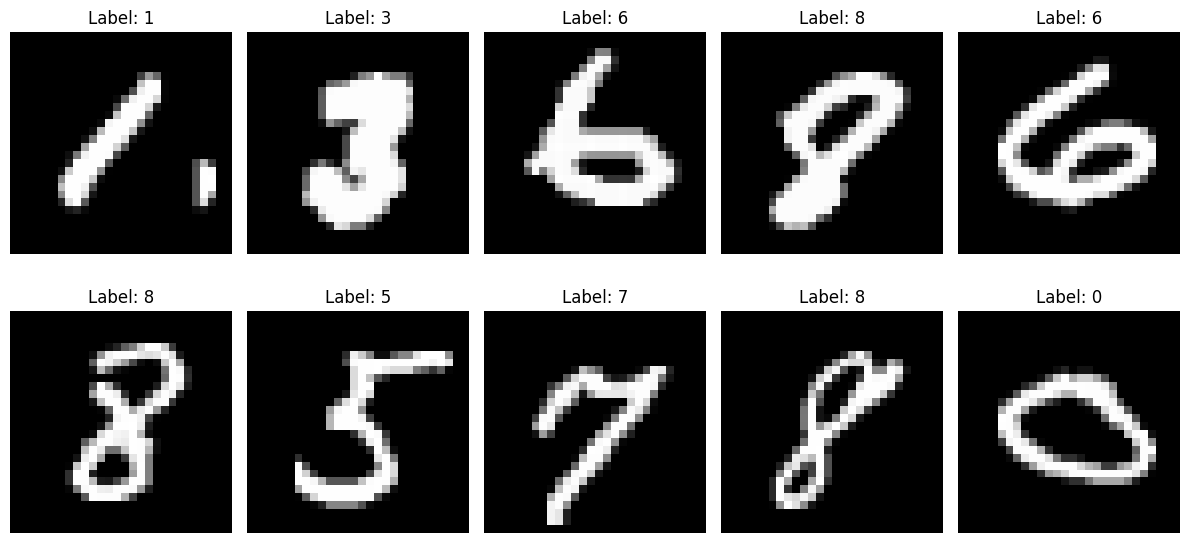

Using device: cpu
Epoch [1/30], Train Loss: 0.737316, Valid Loss: 0.704477
Epoch [2/30], Train Loss: 0.698642, Valid Loss: 0.695768
Epoch [3/30], Train Loss: 0.690763, Valid Loss: 0.690323
Epoch [4/30], Train Loss: 0.686627, Valid Loss: 0.688162
Epoch [5/30], Train Loss: 0.684370, Valid Loss: 0.686059
Epoch [6/30], Train Loss: 0.682182, Valid Loss: 0.685161
Epoch [7/30], Train Loss: 0.681110, Valid Loss: 0.684319
Epoch [8/30], Train Loss: 0.680080, Valid Loss: 0.682564
Epoch [9/30], Train Loss: 0.679388, Valid Loss: 0.682455
Epoch [10/30], Train Loss: 0.678416, Valid Loss: 0.682142
Epoch [11/30], Train Loss: 0.677728, Valid Loss: 0.681900
Epoch [12/30], Train Loss: 0.677494, Valid Loss: 0.681558
Epoch [13/30], Train Loss: 0.677187, Valid Loss: 0.681614
Epoch [14/30], Train Loss: 0.676446, Valid Loss: 0.681455
Epoch [15/30], Train Loss: 0.676104, Valid Loss: 0.681610
Epoch [16/30], Train Loss: 0.675959, Valid Loss: 0.679535
Epoch [17/30], Train Loss: 0.675723, Valid Loss: 0.679516
Epoch

c:\Users\Asif\Documents\my_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


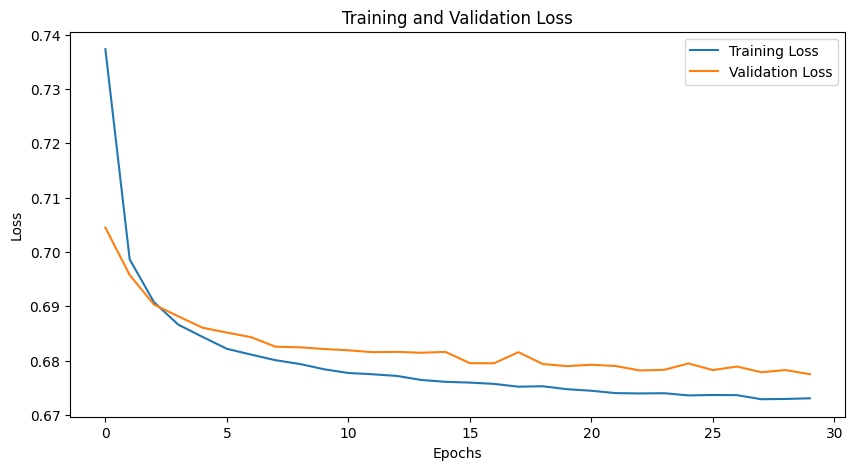

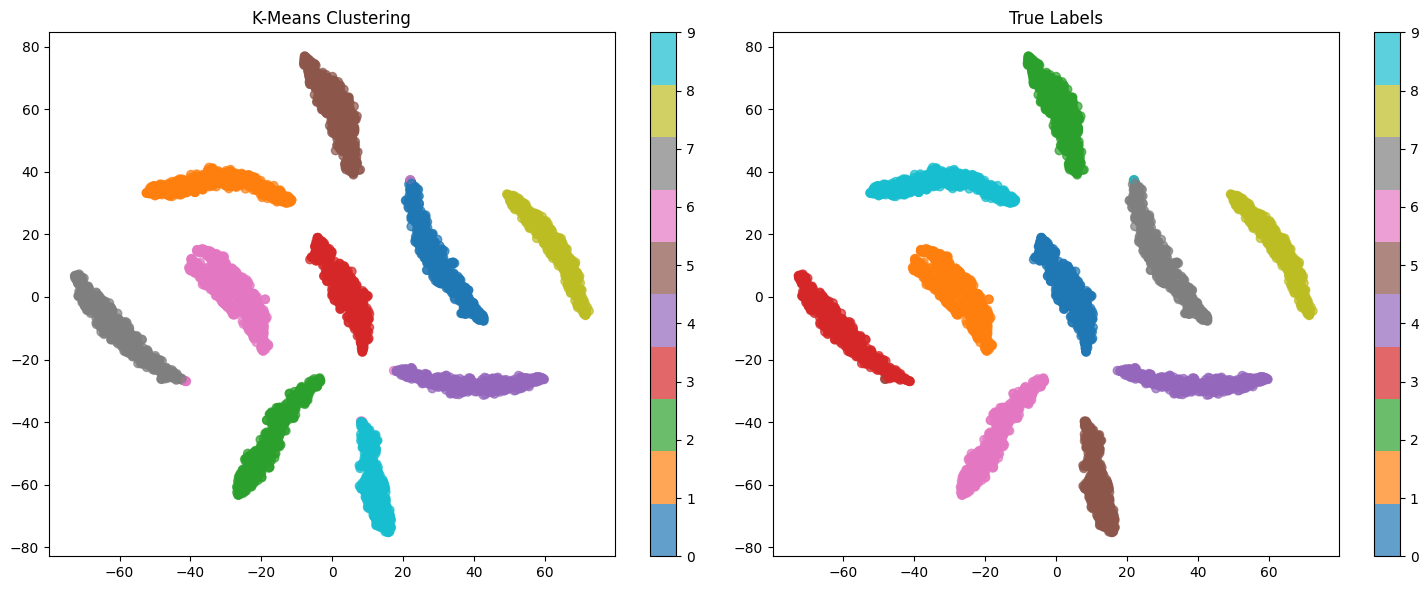

Visualization saved to 'enhanced_mnist_clustering2.png'


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import io
from PIL import Image

# 1. Load the MNIST dataset from parquet file
print("Loading MNIST dataset from parquet file...")
parquet_path = r"C:\Users\Asif\Downloads\train.parquet"
parquet_data = pq.read_table(parquet_path).to_pandas()

print(f"Parquet file columns: {parquet_data.columns}")
print(f"Number of samples: {len(parquet_data)}")

# 2. Process the image data properly - PNG bytes format
images = []
labels = []

print("Processing image data...")
# Sample the first image to understand its format
sample_img = parquet_data['image'].iloc[0]
print(f"Image type: {type(sample_img)}")
print(f"Dictionary keys: {sample_img.keys()}")

# Extract PNG image data from bytes
print("Extracting images from PNG byte data...")
for i, row in enumerate(parquet_data.itertuples()):
    if i % 1000 == 0:
        print(f"Processing image {i}/{len(parquet_data)}")
    
    # Get bytes data
    img_bytes = row.image['bytes']
    
    # Convert bytes to PIL Image
    img_pil = Image.open(io.BytesIO(img_bytes))
    
    # Convert PIL image to numpy array
    img_array = np.array(img_pil)
    
    # MNIST images are grayscale, but may have different formats
    if len(img_array.shape) == 3 and img_array.shape[2] > 1:
        # Convert RGB to grayscale if needed
        img_array = np.mean(img_array, axis=2).astype(np.uint8)
    
    images.append(img_array)
    labels.append(row.label)

# Stack all image arrays
image_data = np.stack(images)
label_data = np.array(labels)

print(f"Successfully extracted {len(images)} images")
print(f"Image data shape: {image_data.shape}")
print(f"Label data shape: {label_data.shape}")

# Convert to PyTorch tensors
train_images = torch.tensor(image_data, dtype=torch.float32)
train_labels = torch.tensor(label_data, dtype=torch.long)

# Normalize images to [0, 1]
train_images = train_images / 255.0

# Add channel dimension for CNN input [batch, channel, height, width]
train_images = train_images.unsqueeze(1)

print(f"Final tensor shape: {train_images.shape}")

# Split into train and validation sets (80% train, 20% validation)
from sklearn.model_selection import train_test_split
indices = np.arange(len(train_images))
train_idx, valid_idx = train_test_split(indices, test_size=0.2, random_state=42, stratify=label_data)

valid_images = train_images[valid_idx]
valid_labels = train_labels[valid_idx]
train_images = train_images[train_idx]
train_labels = train_labels[train_idx]

print(f"Data loaded successfully.")
print(f"Train set: {len(train_images)} images")
print(f"Validation set: {len(valid_images)} images")

# Create DataLoaders
batch_size = 128
train_dataset = TensorDataset(train_images, train_labels)
valid_dataset = TensorDataset(valid_images, valid_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Visualize some images to confirm they're loaded correctly
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i, 0].numpy(), cmap='gray')
    plt.title(f"Label: {train_labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_samples22.png')
plt.show()

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

# Enhanced autoencoder with improved architecture
class EnhancedAutoencoder(nn.Module):
    def __init__(self, latent_dim=10):
        super().__init__()
        self.latent_dim = latent_dim
        
        # Encoder with more filters and batch normalization
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, stride=2),  # 14x14
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, stride=2),  # 7x7
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, latent_dim)
        )
        
        # Decoder with corresponding structure
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 64 * 7 * 7),
            nn.BatchNorm1d(64 * 7 * 7),
            nn.LeakyReLU(0.2),
            nn.Unflatten(1, (64, 7, 7)),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon, z

# Contrastive loss for better feature learning
def contrastive_loss(embeddings, labels, temperature=0.5):
    batch_size = embeddings.size(0)
    labels = labels.contiguous().view(-1, 1)
    
    # Create mask for positive pairs
    mask = torch.eq(labels, labels.T).float()
    mask = mask.fill_diagonal_(0)
    
    # Normalize embeddings
    embeddings_normalized = F.normalize(embeddings, p=2, dim=1)
    
    # Compute similarity matrix
    logits = torch.matmul(embeddings_normalized, embeddings_normalized.T) / temperature
    logits = logits - torch.max(logits, dim=1, keepdim=True)[0]  # For numerical stability
    
    # Compute log_prob
    exp_logits = torch.exp(logits)
    log_prob = logits - torch.log(exp_logits.sum(dim=1, keepdim=True))
    
    # Compute mean of log-likelihood over positive pairs
    mean_log_prob_pos = (mask * log_prob).sum(1) / mask.sum(1).clamp(min=1e-8)
    
    return -mean_log_prob_pos.mean()

# Modified training function with combined loss
def train_enhanced_model(model, train_loader, valid_loader, epochs=30, alpha=0.8, beta=0.2):
    device = next(model.parameters()).device
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5
    )
    
    recon_criterion = nn.MSELoss()
    train_losses = []
    valid_losses = []
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            
            # Forward pass
            recon, z = model(data)
            
            # Compute losses
            rec_loss = recon_criterion(recon, data)
            cont_loss = contrastive_loss(z, labels)
            loss = alpha * rec_loss + beta * cont_loss
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
        
        # Validation
        model.eval()
        valid_loss = 0
        with torch.no_grad():
            for data, labels in valid_loader:
                data, labels = data.to(device), labels.to(device)
                recon, z = model(data)
                
                rec_loss = recon_criterion(recon, data)
                cont_loss = contrastive_loss(z, labels)
                loss = alpha * rec_loss + beta * cont_loss
                
                valid_loss += loss.item()
        
        train_loss /= len(train_loader)
        valid_loss /= len(valid_loader)
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        
        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {train_loss:.6f}, "
              f"Valid Loss: {valid_loss:.6f}")
        
        # Learning rate scheduling
        scheduler.step(valid_loss)
    
    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.savefig('enhanced_training_history2.png')
    
    return model

# Extract embeddings with improved model
def extract_embeddings(dataloader, model):
    model.eval()
    embeddings = []
    labels = []
    
    device = next(model.parameters()).device
    
    with torch.no_grad():
        for data, target in dataloader:
            data = data.to(device)
            _, z = model(data)
            embeddings.append(z.cpu().numpy())
            labels.append(target.numpy())
    
    return np.vstack(embeddings), np.concatenate(labels)

# Improved clustering with normalized embeddings
def improved_clustering(embeddings, true_labels):
    # Scale the embeddings
    scaler = StandardScaler()
    scaled_embeddings = scaler.fit_transform(embeddings)
    
    # Try different numbers of clusters
    n_clusters_range = [8, 9, 10, 11, 12]
    silhouette_scores = []
    
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=30, max_iter=500, random_state=42)
        cluster_labels = kmeans.fit_predict(scaled_embeddings)
        score = silhouette_score(scaled_embeddings, cluster_labels)
        silhouette_scores.append(score)
        print(f"K-Means with {n_clusters} clusters - Silhouette Score: {score:.4f}")
    
    # Select best number of clusters
    best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
    print(f"\nBest number of clusters: {best_n_clusters}")
    
    # Final clustering with best parameters
    kmeans = KMeans(n_clusters=best_n_clusters, n_init=50, max_iter=1000, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_embeddings)
    
    # Evaluate clustering
    silhouette = silhouette_score(scaled_embeddings, cluster_labels)
    davies_bouldin = davies_bouldin_score(scaled_embeddings, cluster_labels)
    
    print(f"Final Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    
    return cluster_labels, scaled_embeddings

# Main execution
def main():
    # Assuming train_images, train_labels, valid_images, valid_labels are already defined
    
    # Create enhanced model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    
    model = EnhancedAutoencoder(latent_dim=10).to(device)
    
    # Train with enhanced approach
    model = train_enhanced_model(model, train_loader, valid_loader, epochs=30)
    
    # Extract embeddings
    print("Extracting embeddings...")
    embeddings, true_labels = extract_embeddings(train_loader, model)
    print(f"Embeddings shape: {embeddings.shape}")
    
    # Perform improved clustering
    print("Performing improved clustering...")
    cluster_labels, scaled_embeddings = improved_clustering(embeddings, true_labels)
    
    # Visualize with t-SNE
    print("Generating t-SNE visualization...")
    # Use a subset for faster visualization
    subset_size = min(5000, len(embeddings))
    subset_indices = np.random.choice(len(embeddings), subset_size, replace=False)
    
    tsne = TSNE(n_components=2, perplexity=40, n_iter=1000, learning_rate=200, random_state=42)
    reduced_embeddings = tsne.fit_transform(scaled_embeddings[subset_indices])
    
    # Compare clusters with true labels
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot clustering results
    scatter1 = axes[0].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                              c=cluster_labels[subset_indices], cmap='tab10', alpha=0.7)
    axes[0].set_title("K-Means Clustering")
    plt.colorbar(scatter1, ax=axes[0])
    
    # Plot true labels
    scatter2 = axes[1].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], 
                              c=true_labels[subset_indices], cmap='tab10', alpha=0.7)
    axes[1].set_title("True Labels")
    plt.colorbar(scatter2, ax=axes[1])
    
    plt.tight_layout()
    plt.savefig('enhanced_mnist_clustering2.png')
    plt.show()
    
    print("Visualization saved to 'enhanced_mnist_clustering2.png'")

# Run the pipeline
if __name__ == "__main__":
    main()